In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()



In [3]:
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME','Tarih'])
    seri.columns = [f"{series_code}"]
    seri[f"{series_code}"] = pd.to_numeric(seri[f"{series_code}"])

    seri=seri.set_index(pd.date_range(start=params["startDate"],freq="M",periods=len(seri)))

        
    seri=seri.dropna()

    return seri

In [4]:
import yfinance as yf 


In [5]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(usd)))
usd=usd.dropna()
usd

,USD/TL
2006-01-31,1.334344
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
...,...
2024-05-31,32.247882
2024-06-30,32.521235
2024-07-31,32.894495
2024-08-31,33.621248


In [6]:
params = {
    'series': "TP.FE.OKTG01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf = formatted_response['items']
enf = pd.DataFrame(enf)


enf = enf.drop(columns=['UNIXTIME','Tarih'])
enf.columns = ['TÜFE']
enf['TÜFE'] = pd.to_numeric(enf['TÜFE'])
enf=enf.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf)))
enf

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2024-04-30,2207.50
2024-05-31,2281.85
2024-06-30,2319.29
2024-07-31,2394.10


In [7]:
params = {
    'series': "TP.PR.ARZ13",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

money = formatted_response['items']
money = pd.DataFrame(money)


money = money.drop(columns=['UNIXTIME','Tarih'])
money.columns = ['Para Arzi']
money['Para Arzi'] = pd.to_numeric(money['Para Arzi'])
money=money.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(money)))
money=money.pct_change()*100
money=money.dropna()
money

,Para Arzi
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2024-05-31,1.859475
2024-06-30,3.031203
2024-07-31,2.447422
2024-08-31,3.805914


In [8]:
params = {
    'series': "TP.PR.ARZ22",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','YEARWEEK'])
m3.columns = ['Tarih','M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3 = m3.set_index(pd.to_datetime(m3["Tarih"], format="%d-%m-%Y"))
del m3["Tarih"]
m3=m3.pct_change(4)*100
m3=m3.resample('M').last()
m3=m3.dropna()
m3

,M3
Tarih,
2006-02-28,2.204708
2006-03-31,2.711175
2006-04-30,1.323922
2006-05-31,9.308200
2006-06-30,-0.288618
...,...
2024-05-31,3.570039
2024-06-30,3.080662
2024-07-31,3.027772


In [9]:
params = {
    'series': "TP.PR.ARZ01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m1 = formatted_response['items']
m1 = pd.DataFrame(m1)


m1 = m1.drop(columns=['UNIXTIME','YEARWEEK'])
m1.columns = ['Tarih','M1']
m1['M1'] = pd.to_numeric(m1['M1'])
m1 = m1.set_index(pd.to_datetime(m1["Tarih"], format="%d-%m-%Y"))
del m1["Tarih"]
m1=m1.pct_change(4)*100
m1=m1.resample('M').last()
m1=m1.dropna()
m1

,M1
Tarih,
2006-02-28,4.504977
2006-03-31,5.085533
2006-04-30,3.473587
2006-05-31,10.905356
2006-06-30,-0.497357
...,...
2024-05-31,0.857734
2024-06-30,2.591976
2024-07-31,0.056929


In [10]:
params = {
    'series': "TP.TIG08",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

issizlik = formatted_response['items']
issizlik = pd.DataFrame(issizlik)


issizlik = issizlik.drop(columns=['UNIXTIME','Tarih'])
issizlik.columns = ['İşsizlik']
issizlik['İşsizlik'] = pd.to_numeric(issizlik['İşsizlik'])
issizlik=issizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(issizlik)))
issizlik=issizlik.dropna()
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2024-03-31,8.6
2024-04-30,8.6
2024-05-31,8.5
2024-06-30,9.2


In [11]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2024-05-31,82.991819
2024-06-30,82.889474
2024-07-31,83.717727


In [12]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','YEARWEEK'])
kredi.columns = ['Tarih','Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi = kredi.set_index(pd.to_datetime(kredi["Tarih"], format="%d-%m-%Y"))
del kredi["Tarih"]
kredi=kredi.pct_change(4)*100
kredi=kredi.resample('M').last()
kredi=kredi.dropna()
kredi

,Kredi
Tarih,
2006-02-28,1.559036
2006-03-31,5.768193
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.965727
...,...
2024-05-31,2.996833
2024-06-30,2.281882
2024-07-31,1.391026


In [13]:
params = {
    'series': "TP.APIFON4",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

pfaiz = formatted_response['items']
pfaiz = pd.DataFrame(pfaiz)


pfaiz = pfaiz.drop(columns=['UNIXTIME','Tarih'])
pfaiz.columns = ['Faiz']
pfaiz['Faiz'] = pd.to_numeric(pfaiz['Faiz'])
pfaiz=pfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(pfaiz)))
pfaiz=pfaiz.dropna()
pfaiz

,Faiz
2011-01-31,6.438571
2011-02-28,6.250000
2011-03-31,6.250000
2011-04-30,6.267619
2011-05-31,6.250000
...,...
2024-05-31,50.544545
2024-06-30,50.106471
2024-07-31,50.000000
2024-08-31,50.337619


In [14]:
motorin=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar.xls")
motorin=motorin.iloc[-1,:]
motorin=pd.DataFrame(motorin[3:])
motorin=motorin.set_index(pd.date_range(start="2005-01-31",periods=len(motorin),freq="M"))
motorin.columns=["Motorin"]
motorin

,Motorin
2005-01-31,1.75
2005-02-28,1.78
2005-03-31,1.87
2005-04-30,1.94
2005-05-31,1.88
...,...
2024-03-31,42.0568
2024-04-30,42.6763
2024-05-31,41.2854
2024-06-30,41.4054


In [15]:
dogalgaz=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar.xls")
dogalgaz=dogalgaz.iloc[-5,:]
dogalgaz=pd.DataFrame(dogalgaz[3:])
dogalgaz=dogalgaz.set_index(pd.date_range(start="2005-01-31",periods=len(dogalgaz),freq="M"))
dogalgaz.columns=["Doğalgaz"]

In [16]:
elektrik=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar.xls")
elektrik=elektrik.iloc[-6,:]
elektrik=pd.DataFrame(elektrik[3:])
elektrik=elektrik.set_index(pd.date_range(start="2005-01-31",periods=len(elektrik),freq="M"))
elektrik.columns=["Elektrik"]

In [17]:
params = {
    'series': "TP.TRY.MT02",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

mfaiz = formatted_response['items']
mfaiz = pd.DataFrame(mfaiz)


mfaiz = mfaiz.drop(columns=['UNIXTIME','Tarih'])
mfaiz.columns = ['Mevduat Faizi']
mfaiz['Mevduat Faizi'] = pd.to_numeric(mfaiz['Mevduat Faizi'])
mfaiz=mfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(mfaiz)))
mfaiz=mfaiz.dropna()
mfaiz

,Mevduat Faizi
2006-01-31,15.913333
2006-02-28,15.760000
2006-03-31,15.330000
2006-04-30,15.175000
2006-05-31,14.925000
...,...
2024-05-31,64.538000
2024-06-30,59.695000
2024-07-31,59.382500
2024-08-31,59.024000


In [18]:
params = {
    'series': "TP.BEK.S01.A.S",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf_belirsizlik = formatted_response['items']
enf_belirsizlik = pd.DataFrame(enf_belirsizlik)


enf_belirsizlik = enf_belirsizlik.drop(columns=['UNIXTIME','Tarih'])
enf_belirsizlik.columns = ['Enflasyon Belirsizliği']
enf_belirsizlik['Enflasyon Belirsizliği'] = pd.to_numeric(enf_belirsizlik['Enflasyon Belirsizliği'])
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf_belirsizlik)))
enf_belirsizlik=enf_belirsizlik.dropna()
enf_belirsizlik

,Enflasyon Belirsizliği
2013-01-31,0.32
2013-02-28,0.22
2013-03-31,0.16
2013-04-30,0.26
2013-05-31,0.29
...,...
2024-05-31,0.47
2024-06-30,0.48
2024-07-31,0.60
2024-08-31,0.49


In [19]:
params = {
    'series': "TP.FG.B01.95",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ito = formatted_response['items']
ito = pd.DataFrame(ito)


ito = ito.drop(columns=['UNIXTIME','Tarih'])
ito.columns = ['İTO']
ito['İTO'] = pd.to_numeric(ito['İTO'])
ito=ito.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ito)))
ito=ito.pct_change()*100
ito=ito.dropna()
ito

,İTO
2006-02-28,1.005528
2006-03-31,0.137253
2006-04-30,2.088936
2006-05-31,1.595826
2006-06-30,-0.100368
...,...
2024-04-30,4.894259
2024-05-31,3.589407
2024-06-30,3.420697
2024-07-31,4.207686


In [20]:
params = {
    'series': "TP.FE.OKTG04",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tufec = formatted_response['items']
tufec = pd.DataFrame(tufec)


tufec = tufec.drop(columns=['UNIXTIME','Tarih'])
tufec.columns = ['TÜFE C']
tufec['TÜFE C'] = pd.to_numeric(tufec['TÜFE C'])
tufec=tufec.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(tufec)))
tufec=tufec.pct_change()*100
tufec=tufec.shift(1)
tufec=tufec.dropna()
tufec

,TÜFE C
2006-03-31,-1.101304
2006-04-30,-0.368460
2006-05-31,1.857331
2006-06-30,2.622237
2006-07-31,1.344445
...,...
2024-04-30,3.524351
2024-05-31,3.562117
2024-06-30,3.760332
2024-07-31,1.727271


In [21]:
params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
2006-02-28,0.256616
2006-03-31,0.247960
2006-04-30,1.938881
2006-05-31,2.770820
2006-06-30,4.021325
...,...
2024-04-30,3.602753
2024-05-31,1.957875
2024-06-30,1.376326
2024-07-31,1.941578


In [22]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['ÜFE']
ihracat['ÜFE'] = pd.to_numeric(ihracat['ÜFE'])
ihracat=ihracat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ihracat)))
ihracat=ihracat.shift(1)
ihracat=ihracat.dropna()
ihracat=ihracat.pct_change()*100
ihracat

,ÜFE
2013-02-28,NaN
2013-03-31,7.272509
2013-04-30,6.926004
2013-05-31,-4.381315
2013-06-30,5.141469
...,...
2024-03-31,5.570999
2024-04-30,7.372996
2024-05-31,-14.751519
2024-06-30,25.347778


In [23]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['ÜFE']
ithalat['ÜFE'] = pd.to_numeric(ithalat['ÜFE'])
ithalat=ithalat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ithalat)))
ithalat=ithalat.shift(1)
ithalat=ithalat.dropna()
ithalat=ithalat.pct_change()*100
ithalat

,ÜFE
2013-02-28,NaN
2013-03-31,3.993020
2013-04-30,4.802567
2013-05-31,11.093906
2013-06-30,0.635134
...,...
2024-03-31,6.286018
2024-04-30,7.506729
2024-05-31,-2.524589
2024-06-30,5.057013


In [24]:
params = {
    'series': "TP.PKAUO.S01.A.U",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

anket = formatted_response['items']
anket = pd.DataFrame(anket)


anket = anket.drop(columns=['UNIXTIME','Tarih'])
anket.columns = ['ÜFE']
anket['ÜFE'] = pd.to_numeric(anket['ÜFE'])
anket=anket.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(anket)))
anket=anket.dropna()

anket

,ÜFE
2013-01-31,0.85
2013-02-28,0.53
2013-03-31,0.48
2013-04-30,0.65
2013-05-31,0.46
...,...
2024-05-31,3.04
2024-06-30,2.52
2024-07-31,2.77
2024-08-31,2.55


In [25]:
data=pd.DataFrame()
data["USD/TL"]=usd["USD/TL"].resample('M').mean().rolling(3).mean()
data["Motorin"]=motorin["Motorin"]
data["Motorin1"]=motorin["Motorin"].shift(1)
data["Motorin2"]=motorin["Motorin"]
data["TÜFE"]=enf["TÜFE"]
data["TÜFEt-1"]=data["TÜFE"].shift(1)
data["Doğalgaz"]=dogalgaz["Doğalgaz"]
data["Elektrik"]=elektrik["Elektrik"]
data=data.pct_change()*100
data["M3"]=m3["M3"].rolling(3).mean()
data["ÜFEt1"]=üfe["ÜFE"].shift(1)
data["ÜFEt2"]=üfe["ÜFE"].shift(2)
data["TÜFECt1"]=tufec["TÜFE C"]
data["TÜFECt2"]=tufec["TÜFE C"].shift(1)
data["İTO"]=ito["İTO"]
data["İhracat"]=ihracat["ÜFE"]
data["İthalat"]=ithalat["ÜFE"]
data["Anket"]=anket["ÜFE"]
data

,USD/TL,Motorin,Motorin1,Motorin2,TÜFE,TÜFEt-1,Doğalgaz,Elektrik,M3,ÜFEt1,ÜFEt2,TÜFECt1,TÜFECt2,İTO,İhracat,İthalat,Anket
2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-28,NaN,0.000000,1.485149,0.000000,0.218500,NaN,-2.040816,0.000000,NaN,NaN,NaN,NaN,NaN,1.005528,NaN,NaN,NaN
2006-03-31,NaN,0.975610,0.000000,0.975610,0.274548,0.218500,6.250000,0.000000,NaN,0.256616,NaN,-1.101304,NaN,0.137253,NaN,NaN,NaN
2006-04-30,0.075089,2.898551,0.975610,2.898551,1.336769,0.274548,0.000000,0.000000,2.079935,0.247960,0.256616,-0.368460,-1.101304,2.088936,NaN,NaN,NaN
2006-05-31,2.353679,4.694836,2.898551,4.694836,1.875397,1.336769,1.960784,0.000000,4.447765,1.938881,0.247960,1.857331,-0.368460,1.595826,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,1.565526,-3.259186,1.473008,-3.259186,3.368063,3.179759,28.892737,0.000000,2.887641,3.602753,3.294983,3.562117,3.524351,3.589407,-14.751519,-2.524589,3.04
2024-06-30,0.553511,0.290660,-3.259186,0.290660,1.640774,3.368063,1.154163,0.000000,3.018583,1.957875,3.602753,3.760332,3.562117,3.420697,25.347778,5.057013,2.52
2024-07-31,0.581912,9.118859,0.290660,9.118859,3.225556,1.640774,2.601950,37.997137,3.226157,1.376326,1.957875,1.727271,3.760332,4.207686,-21.356708,-18.787382,2.77
2024-08-31,1.406221,0.000000,0.000000,0.000000,2.474416,3.225556,0.000000,0.000000,3.358181,1.941578,1.376326,2.453794,1.727271,1.727957,NaN,NaN,2.55


In [26]:
data["Kredi"]=kredi["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].rolling(3).mean()
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Faiz"]
data["Zam"]=0
data=data[['USD/TL', 'Motorin','M3', 'Enflasyon Belirsizliği','Zam',"Doğalgaz","Elektrik",'Motorin1','Motorin2','TÜFEt-1','ParaArzi','Kredi','İhracat','İthalat','Mevduat Faizi','Anket','İşsizlik','Politika Faizi','ÜFEt2','TÜFECt2','ÜFEt1','TÜFECt1','İTO','TÜFE']]
data.iloc[:12,4]=380.46
data.iloc[12:18,4]=403.03
data.iloc[18:24,4]=419.15
data.iloc[24:30,4]=481.55
data.iloc[30:36,4]=503.26
data.iloc[36:42,4]=527.13
data.iloc[42:48,4]=546.48
data.iloc[48:54,4]=576.57
data.iloc[54:60,4]=599.12
data.iloc[60:66,4]=629.96
data.iloc[66:72,4]=658.95
data.iloc[72:78,4]=701.13
data.iloc[78:84,4]=739.79
data.iloc[84:90,4]=773.01
data.iloc[90:96,4]=803.68
data.iloc[96:102,4]=846.00
data.iloc[102:108,4]=891.03
data.iloc[108:114,4]=949.07
data.iloc[114:120,4]=1000.54
data.iloc[120:132,4]=1300.99
data.iloc[132:144,4]=1404.06
data.iloc[144:156,4]=1603.12
data.iloc[156:168,4]=2020.9
data.iloc[168:180,4]=2324.71
data.iloc[180:192,4]=2825.90
data.iloc[192:198,4]=4253.4
data.iloc[198:204,4]=5500.35
data.iloc[204:210,4]=8506.8
data.iloc[210:216,4]=11402.33
data.iloc[216:,4]=17002
data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)
data["İşsizlik"].iloc[-2:]=8.4


data=data.loc["2014-01-31":]
data["TÜFE"].loc["2023-05-31"]+=2.88
data["ÜFEt1"].iloc[-1]=1.68
data["ÜFEt2"].iloc[-2:]=[1.94,1.68]
data["TÜFECt1"].iloc[-1]=2.99
data["TÜFECt2"].iloc[-1]=2.45
data["İhracat"].iloc[-2:]=[21.23,-1.99]
data["İthalat"].iloc[-2:]=[18.96,-9.26]
data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,Doğalgaz,Elektrik,Motorin1,Motorin2,TÜFEt-1,...,Mevduat Faizi,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,TÜFE
2014-01-31,3.732429,2.881984,2.086700,0.37,5.265777,0.065445,-0.223152,1.603103,2.881984,0.460607,...,9.0220,1.06,9.2,7.503636,0.618013,0.625859,1.106494,-0.111246,0.333618,1.978080
2014-02-28,3.033477,1.685899,1.867150,0.31,0.000000,0.280295,0.000000,2.881984,1.685899,1.978080,...,10.6275,0.69,9.5,10.070500,1.106494,-0.111246,3.319203,0.308798,1.009554,0.428192
2014-03-31,2.465778,-2.278097,0.972739,0.16,0.000000,0.428585,0.000000,1.685899,-2.278097,0.428192,...,11.3125,0.65,9.5,10.200952,3.319203,0.308798,1.383675,0.701489,0.989257,1.125608
2014-04-30,-1.344724,-6.214384,0.288775,0.23,0.000000,0.055664,0.307520,-2.278097,-6.214384,1.125608,...,11.0200,0.76,9.7,10.046190,1.383675,0.701489,0.736212,1.197755,2.649799,1.344970
2014-05-31,-1.859714,-0.561578,0.043893,0.26,0.000000,-0.009272,0.000000,-6.214384,-0.561578,1.344970,...,10.4940,0.63,9.7,9.891000,0.736212,1.197755,0.085477,2.119546,0.211698,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,1.565526,-3.259186,2.887641,0.47,0.000000,28.892737,0.000000,1.473008,-3.259186,3.179759,...,64.5380,3.04,8.5,50.544545,3.294983,3.524351,3.602753,3.562117,3.589407,3.368063
2024-06-30,0.553511,0.290660,3.018583,0.48,0.000000,1.154163,0.000000,-3.259186,0.290660,3.368063,...,59.6950,2.52,9.2,50.106471,3.602753,3.562117,1.957875,3.760332,3.420697,1.640774
2024-07-31,0.581912,9.118859,3.226157,0.60,0.000000,2.601950,37.997137,0.290660,9.118859,1.640774,...,59.3825,2.77,8.8,50.000000,1.957875,3.760332,1.376326,1.727271,4.207686,3.225556
2024-08-31,1.406221,0.000000,3.358181,0.49,0.000000,0.000000,0.000000,0.000000,0.000000,3.225556,...,59.0240,2.55,8.4,50.337619,1.940000,1.727271,1.941578,2.453794,1.727957,2.474416


In [27]:
data["Motorin"].iloc[-2]=-1.69
data["Motorin2"].iloc[-2]=-1.69
data["Motorin"].iloc[-1]=-3.03
data["Motorin2"].iloc[-1]=-3.03

In [28]:
kredi.iloc[-1]=0.59

In [29]:
data["Motorin"]=data["Motorin"].rolling(2).mean()
data["Kredi"]=kredi["Kredi"].shift(1).rolling(2).mean()
data["Kredi2"]=kredi["Kredi"].rolling(3).mean()

In [32]:
money.iloc[-1]=1.89

In [34]:
data["ParaArzi"].iloc[-1]=2.71445

In [35]:
m3.iloc[-1]=1.73

In [36]:
m3.rolling(3).mean()

,M3
Tarih,
2006-02-28,NaN
2006-03-31,NaN
2006-04-30,2.079935
2006-05-31,4.447765
2006-06-30,3.447835
...,...
2024-05-31,2.887641
2024-06-30,3.018583
2024-07-31,3.226157


In [37]:
data["M3"].iloc[-1]=2.907961



## Cari Ay Enflasyon Tahmini

In [38]:
data=data.dropna()

In [39]:
from sklearn.model_selection import train_test_split
features=['USD/TL', 'Motorin','Motorin1','Motorin2', 'M3', 'Enflasyon Belirsizliği', 'Zam','Elektrik', 'TÜFEt-1',
       'ParaArzi', 'Kredi', 'İhracat', 'İthalat', 'Mevduat Faizi', 'Anket',
       'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1', 'TÜFE']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-8,:],X.iloc[-8:,:]
y_train,y_test=y[:-8],y[-8:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [40]:
features=['USD/TL', 'Motorin','Motorin1','Motorin2', 'M3', 'Enflasyon Belirsizliği', 'Zam','Elektrik', 'TÜFEt-1',
       'ParaArzi', 'Kredi', 'İhracat', 'İthalat', 'Mevduat Faizi', 'Anket',
       'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1', 'TÜFE']

data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,Motorin1,Motorin2,M3,Enflasyon Belirsizliği,Zam,Elektrik,TÜFEt-1,ParaArzi,...,İthalat,Mevduat Faizi,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
0,0.239898,0.042040,0.122407,-0.041980,-0.272470,-0.550369,-0.286359,-0.210711,0.037740,-0.234411,...,-1.368187,-0.656441,-0.653956,-0.987149,-0.553126,-0.385268,-0.898194,0.364605,-0.713312,-0.657717
1,0.068586,-0.367053,-0.040610,-0.579101,-0.799395,-0.935748,-0.286359,-0.210711,-0.655187,-0.696956,...,-0.645125,-0.605276,-0.683832,-0.987149,-0.541048,0.365235,-0.700480,-0.292044,-0.528106,-0.346209
2,-1.081287,-0.993391,-0.580873,-1.112468,-1.202340,-0.755905,-0.286359,-0.172265,-0.343385,-1.085761,...,1.092309,-0.627124,-0.601672,-0.856752,-0.555377,-0.291254,-0.515641,-0.511703,-0.294051,-0.248228
3,-1.236693,-0.857305,-1.117360,-0.346513,-1.346608,-0.678829,-0.286359,-0.210711,-0.245312,-1.303271,...,-0.008061,-0.666413,-0.698771,-0.856752,-0.569746,-0.510859,-0.282049,-0.732472,0.140697,-0.672443
4,-1.154039,-0.146630,-0.346925,0.102163,-0.956360,-0.524677,-0.286359,-0.210711,-0.669926,-0.953254,...,-0.044329,-0.697523,-1.005004,-0.856752,-0.612563,-0.731575,0.151836,-0.938215,-0.149935,-0.710156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,-0.203078,-0.461713,-0.069626,-0.712039,0.328733,-0.139298,-0.286359,-0.210711,0.574990,-0.125547,...,-0.291290,3.370370,1.101286,-1.639136,3.194391,0.357021,0.813075,0.460803,0.821061,0.655410
124,-0.508468,-0.555450,-0.714588,-0.231035,0.405876,-0.113607,-0.286359,-0.210711,0.659178,-0.011716,...,0.382526,3.008625,0.712892,-1.182745,3.153829,0.461410,0.830852,-0.097241,0.914546,-0.116104
125,-0.499897,0.425887,-0.230771,0.965186,0.528164,0.194697,-0.286359,4.539769,-0.113063,0.071738,...,-1.736647,2.985283,0.899620,-1.443540,3.143971,-0.096498,0.924151,-0.294538,-0.044313,0.591757
126,-0.251150,0.268859,-0.270386,-0.499414,0.605944,-0.087915,-0.286359,-0.210711,0.595465,0.420914,...,1.618155,2.958505,0.735299,-1.704335,3.175231,-0.102561,-0.032807,-0.102770,0.298339,0.256252


In [41]:
features=['USD/TL', 'Motorin','Motorin1','Motorin2', 'M3', 'Enflasyon Belirsizliği', 'Zam','Elektrik', 'TÜFEt-1',
       'ParaArzi', 'Kredi','Kredi2', 'İhracat', 'İthalat', 'Mevduat Faizi', 'Anket',
       'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1', 'TÜFE']

data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,Motorin1,Motorin2,M3,Enflasyon Belirsizliği,Zam,Elektrik,TÜFEt-1,ParaArzi,...,İthalat,Mevduat Faizi,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
0,0.239898,0.042040,0.122407,-0.041980,-0.272470,-0.550369,-0.286359,-0.210711,0.037740,-0.234411,...,-1.368187,-0.656441,-0.653956,-0.987149,-0.553126,-0.385268,-0.898194,0.364605,-0.713312,-0.657717
1,0.068586,-0.367053,-0.040610,-0.579101,-0.799395,-0.935748,-0.286359,-0.210711,-0.655187,-0.696956,...,-0.645125,-0.605276,-0.683832,-0.987149,-0.541048,0.365235,-0.700480,-0.292044,-0.528106,-0.346209
2,-1.081287,-0.993391,-0.580873,-1.112468,-1.202340,-0.755905,-0.286359,-0.172265,-0.343385,-1.085761,...,1.092309,-0.627124,-0.601672,-0.856752,-0.555377,-0.291254,-0.515641,-0.511703,-0.294051,-0.248228
3,-1.236693,-0.857305,-1.117360,-0.346513,-1.346608,-0.678829,-0.286359,-0.210711,-0.245312,-1.303271,...,-0.008061,-0.666413,-0.698771,-0.856752,-0.569746,-0.510859,-0.282049,-0.732472,0.140697,-0.672443
4,-1.154039,-0.146630,-0.346925,0.102163,-0.956360,-0.524677,-0.286359,-0.210711,-0.669926,-0.953254,...,-0.044329,-0.697523,-1.005004,-0.856752,-0.612563,-0.731575,0.151836,-0.938215,-0.149935,-0.710156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,-0.203078,-0.461713,-0.069626,-0.712039,0.328733,-0.139298,-0.286359,-0.210711,0.574990,-0.125547,...,-0.291290,3.370370,1.101286,-1.639136,3.194391,0.357021,0.813075,0.460803,0.821061,0.655410
124,-0.508468,-0.555450,-0.714588,-0.231035,0.405876,-0.113607,-0.286359,-0.210711,0.659178,-0.011716,...,0.382526,3.008625,0.712892,-1.182745,3.153829,0.461410,0.830852,-0.097241,0.914546,-0.116104
125,-0.499897,0.425887,-0.230771,0.965186,0.528164,0.194697,-0.286359,4.539769,-0.113063,0.071738,...,-1.736647,2.985283,0.899620,-1.443540,3.143971,-0.096498,0.924151,-0.294538,-0.044313,0.591757
126,-0.251150,0.268859,-0.270386,-0.499414,0.605944,-0.087915,-0.286359,-0.210711,0.595465,0.420914,...,1.618155,2.958505,0.735299,-1.704335,3.175231,-0.102561,-0.032807,-0.102770,0.298339,0.256252


In [42]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2,l1
from sklearn.model_selection import TimeSeriesSplit

def objective(trial):
 
    selected_features=['Kredi2', 'USD/TL', 'Motorin2', 'Zam','ParaArzi','Enflasyon Belirsizliği','İşsizlik']







    X=scaled_data[selected_features]
    y=scaled_data["TÜFE"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=selected_features)
    y=pd.DataFrame(y,columns=["TÜFE"])
    X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
    y_train,y_test=y[:-7],y[-7:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)


    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 512)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','linear','sigmoid'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1])))
    model.add(Dropout(rlrate))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) 

    

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns=["TÜFE"]
    tahminler["Tahmin"]=scaler2.inverse_transform(y_pred)
    tahminler=tahminler.set_index(data.index[-7:])
    tahminler["Tahmin"].loc["2024-05-31"]+=0.66
    mse=mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["Tahmin"].iloc[:-1])
    print(tahminler["Tahmin"].iloc[-1])


    return mse # Return validation accuracy as the objective

"""study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=400)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)"""

"study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective\nstudy.optimize(objective, n_trials=400)  # You can adjust the number of trials\n\n# Print the best hyperparameters\nprint('Best hyperparameters:', study.best_params)"

In [43]:
selected_features=['Motorin','USD/TL', 'M3', 'Enflasyon Belirsizliği', 'Anket','Kredi', 'ÜFEt1','Zam']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=493,activation="selu",input_dim=(X_train.shape[1])))
model.add(Dropout(0.11336402761788121))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0019662340108436596)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=31,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN1"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-7:])

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 1.0340 - mean_squared_error: 1.0340 - val_loss: 0.1176 - val_mean_squared_error: 0.1176
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4310 - mean_squared_error: 0.4310 - val_loss: 0.0740 - val_mean_squared_error: 0.0740
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2367 - mean_squared_error: 0.2367 - val_loss: 0.2508 - val_mean_squared_error: 0.2508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [44]:
tahminler["NN1"].loc["2024-05-31"]+=0.66

In [45]:
mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN1"].iloc[:-1])

0.038767990881287816

In [46]:
tahminler

,TÜFE,NN1
2024-03-31,3.162671,3.405937
2024-04-30,3.179759,3.114102
2024-05-31,3.368063,3.153597
2024-06-30,1.640774,1.928804
2024-07-31,3.225556,3.037845
2024-08-31,2.474416,2.404233
2024-09-30,0.000000,1.522166


In [43]:
from sklearn.model_selection import train_test_split

In [47]:
selected_features=['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi2','İhracat','Anket',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=498,activation="sigmoid",input_dim=(X_train.shape[1])))
model.add(Dropout(0.7249816282550432))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002441520773424008)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=12,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler2=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler2.columns=["TÜFE"]
tahminler2["NN2"]=scaler2.inverse_transform(y_pred)
tahminler2=tahminler2.set_index(data.index[-7:])

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.4359 - mean_squared_error: 2.4359 - val_loss: 0.3328 - val_mean_squared_error: 0.3328
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3666 - mean_squared_error: 1.3666 - val_loss: 0.2398 - val_mean_squared_error: 0.2398
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4634 - mean_squared_error: 1.4634 - val_loss: 0.1841 - val_mean_squared_error: 0.1841
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5188 - mean_squared_error: 1.5188 - val_loss: 0.1936 - val_mean_squared_error: 0.1936
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [48]:
tahminler2["NN2"].loc["2024-05-31"]+=0.66
mean_squared_error(tahminler2["TÜFE"].iloc[:-1],tahminler2["NN2"].iloc[:-1])

0.1890715166768877

In [49]:
tahminler2

,TÜFE,NN2
2024-03-31,3.162671,3.479175
2024-04-30,3.179759,3.093658
2024-05-31,3.368063,3.502468
2024-06-30,1.640774,2.313914
2024-07-31,3.225556,2.565804
2024-08-31,2.474416,2.127450
2024-09-30,0.000000,1.932795


In [50]:
selected_features=['USD/TL', 'Motorin2', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1']



X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=317,activation="relu",input_dim=(X_train.shape[1])))
model.add(Dropout(0.7057986319058811))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0007237057956408535)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=24,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler3=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler3.columns=["TÜFE"]
tahminler3["NN3"]=scaler2.inverse_transform(y_pred)
tahminler3=tahminler3.set_index(data.index[-7:])


Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 1.7525 - mean_squared_error: 1.7525 - val_loss: 0.5108 - val_mean_squared_error: 0.5108
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8272 - mean_squared_error: 0.8272 - val_loss: 0.3699 - val_mean_squared_error: 0.3699
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6162 - mean_squared_error: 0.6162 - val_loss: 0.2866 - val_mean_squared_error: 0.2866
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6752 - mean_squared_error: 0.6752 - val_loss: 0.2368 - val_mean_squared_error: 0.2368
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7630 - mean_squared_error: 0.7630 - val_loss: 0.2037 - val_mean_squared_error: 0.2037
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4988 - mean_squared_error: 0.4988 - val_loss: 0.1819 - val_mean_squared_error: 0.1819
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4173 - mean_squared_error: 0.4173 - val_loss: 0.1648 - va

In [51]:
tahminler3["NN3"].loc["2024-05-31"]+=0.66
mean_squared_error(tahminler3["TÜFE"].iloc[:-1],tahminler3["NN3"].iloc[:-1])

0.11877769084269922

In [52]:
tahminler3

,TÜFE,NN3
2024-03-31,3.162671,2.779948
2024-04-30,3.179759,3.398306
2024-05-31,3.368063,3.355710
2024-06-30,1.640774,2.215450
2024-07-31,3.225556,2.830832
2024-08-31,2.474416,2.294933
2024-09-30,0.000000,2.066991


In [53]:
selected_features=['USD/TL','Motorin2','Anket','Enflasyon Belirsizliği','ÜFEt1','ParaArzi','TÜFEt-1','TÜFECt1','Zam','Kredi2','ÜFEt2','TÜFECt2']




X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=50,activation="selu",input_dim=(X_train.shape[1])))
model.add(Dropout(0.7133299115582274))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.019183580908746986)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=32,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler4=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler4.columns=["TÜFE"]
tahminler4["NN4"]=scaler2.inverse_transform(y_pred)
tahminler4=tahminler4.set_index(data.index[-7:])

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 1.6371 - mean_squared_error: 1.6371 - val_loss: 0.6072 - val_mean_squared_error: 0.6072
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.8648 - mean_squared_error: 1.8648 - val_loss: 0.3058 - val_mean_squared_error: 0.3058
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.2199 - mean_squared_error: 1.2199 - val_loss: 0.1182 - val_mean_squared_error: 0.1182
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.6947 - mean_squared_error: 1.6947 - val_loss: 0.1122 - val_mean_squared_error: 0.1122
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9057 - mean_squared_error: 0.9057 - val_loss: 0.2363 - val_mean_squared_error: 0.2363
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [54]:
tahminler4["NN4"].loc["2024-05-31"]+=0.66
mean_squared_error(tahminler4["TÜFE"].iloc[:-1],tahminler4["NN4"].iloc[:-1])

0.08215575198624481

In [55]:
tahminler4

,TÜFE,NN4
2024-03-31,3.162671,3.028987
2024-04-30,3.179759,3.350904
2024-05-31,3.368063,3.253216
2024-06-30,1.640774,2.269765
2024-07-31,3.225556,3.350036
2024-08-31,2.474416,2.327930
2024-09-30,0.000000,1.604435


In [56]:
selected_features=['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi', 'Anket',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=215,activation="selu",input_dim=(X_train.shape[1])))
model.add(Dropout(0.07165081616985802))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.017145260559799622)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=5000, batch_size=24,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler5=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns=["TÜFE"]
tahminler5["NN5"]=scaler2.inverse_transform(y_pred)
tahminler5=tahminler5.set_index(data.index[-7:])

Epoch 1/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - loss: 2.6119 - mean_squared_error: 2.6119 - val_loss: 1.3401 - val_mean_squared_error: 1.3401
Epoch 2/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.5376 - mean_squared_error: 2.5376 - val_loss: 0.5821 - val_mean_squared_error: 0.5821
Epoch 3/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5793 - mean_squared_error: 1.5793 - val_loss: 0.2992 - val_mean_squared_error: 0.2992
Epoch 4/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4716 - mean_squared_error: 0.4716 - val_loss: 0.2616 - val_mean_squared_error: 0.2616
Epoch 5/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2993 - mean_squared_error: 0.2993 - val_loss: 0.1640 - val_mean_squared_error: 0.1640
Epoch 6/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3035 - mean_squared_error: 0.3035 - val_loss: 0.0643 - val_mean_squared_error: 0.0643
Epoch 7/5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1853 - mean_squared_error: 0.1853 - val_loss: 0.1301 - v

In [57]:
tahminler5["NN5"].loc["2024-05-31"]+=0.66
mean_squared_error(tahminler5["TÜFE"].iloc[:-1],tahminler5["NN5"].iloc[:-1])

0.12337654150891282

In [58]:
tahminler5

,TÜFE,NN5
2024-03-31,3.162671,3.188729
2024-04-30,3.179759,3.475123
2024-05-31,3.368063,3.390100
2024-06-30,1.640774,2.297117
2024-07-31,3.225556,3.694677
2024-08-31,2.474416,2.442883
2024-09-30,0.000000,2.009960


In [59]:
selected_features=['Anket','Enflasyon Belirsizliği','ÜFEt1','ParaArzi','USD/TL','Motorin','TÜFEt-1','TÜFECt1','Kredi','ÜFEt2','Zam','TÜFECt2']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=239,activation="linear",input_dim=(X_train.shape[1])))
model.add(Dropout(0.05035903408592664))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.012424232670914113)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=2000, batch_size=7,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler6=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler6.columns=["TÜFE"]
tahminler6["NN6"]=scaler2.inverse_transform(y_pred)
tahminler6=tahminler6.set_index(data.index[-7:])

Epoch 1/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.1802 - mean_squared_error: 2.1802 - val_loss: 0.3705 - val_mean_squared_error: 0.3705
Epoch 2/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8002 - mean_squared_error: 0.8002 - val_loss: 0.1876 - val_mean_squared_error: 0.1876
Epoch 3/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3892 - mean_squared_error: 0.3892 - val_loss: 0.1659 - val_mean_squared_error: 0.1659
Epoch 4/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5165 - mean_squared_error: 0.5165 - val_loss: 0.1412 - val_mean_squared_error: 0.1412
Epoch 5/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1736 - mean_squared_error: 0.1736 - val_loss: 0.1197 - val_mean_squared_error: 0.1197
Epoch 6/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1830 - mean_squared_error: 0.1830 - val_loss: 0.0736 - val_mean_squared_error: 0.0736
Epoch 7/2000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2135 - mean_squared_error: 0.2135 - val_loss: 0.0

In [60]:
tahminler6["NN6"].loc["2024-05-31"]+=0.66
mean_squared_error(tahminler6["TÜFE"].iloc[:-1],tahminler6["NN6"].iloc[:-1])

0.00402760068697485

In [61]:
tahminler6

,TÜFE,NN6
2024-03-31,3.162671,3.186435
2024-04-30,3.179759,3.175420
2024-05-31,3.368063,3.295154
2024-06-30,1.640774,1.640476
2024-07-31,3.225556,3.108313
2024-08-31,2.474416,2.541649
2024-09-30,0.000000,1.781096


In [62]:
selected_features=['Anket','Enflasyon Belirsizliği','ÜFEt1','ParaArzi','USD/TL','Motorin2','TÜFEt-1','TÜFECt1','Kredi2','ÜFEt2','Zam']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=403,activation="selu",input_dim=(X_train.shape[1])))
model.add(Dropout(0.0016894916261372295))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.004080436929064404)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=5000, batch_size=7,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler7=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler7.columns=["TÜFE"]
tahminler7["NN7"]=scaler2.inverse_transform(y_pred)
tahminler7=tahminler7.set_index(data.index[-7:])

Epoch 1/5000
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.5064 - mean_squared_error: 0.5064 - val_loss: 0.1096 - val_mean_squared_error: 0.1096
Epoch 2/5000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2340 - mean_squared_error: 0.2340 - val_loss: 0.0561 - val_mean_squared_error: 0.0561
Epoch 3/5000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2080 - mean_squared_error: 0.2080 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


In [63]:
tahminler7["NN7"].loc["2024-05-31"]+=0.66
mean_squared_error(tahminler7["TÜFE"].iloc[:-1],tahminler7["NN7"].iloc[:-1])

0.01350111155483145

In [64]:
tahminler7

,TÜFE,NN7
2024-03-31,3.162671,3.137359
2024-04-30,3.179759,3.335312
2024-05-31,3.368063,3.367383
2024-06-30,1.640774,1.789528
2024-07-31,3.225556,3.344688
2024-08-31,2.474416,2.333531
2024-09-30,0.000000,2.022557


In [65]:
hata=[0.0387, 0.1136, 0.09577, 0.0831, 0.0756, 0.0040, 0.0135]
agırlık=1/np.array(hata)
agırlık=agırlık/np.sum(agırlık)
agırlık

array([0.06551347, 0.02231841, 0.02647354, 0.03050988, 0.03353666,
       0.63384278, 0.18780527])

In [66]:
kısatahminler=pd.concat([data["TÜFE"].iloc[-14:],tahminler.iloc[:,1],tahminler2.iloc[:,1],tahminler3.iloc[:,1],tahminler4.iloc[:,1],tahminler5.iloc[:,1],tahminler6.iloc[:,1],tahminler7.iloc[:,1]],axis=1)
kısatahminler["Ortalama"]=kısatahminler.iloc[:,1:].mean(axis=1)
kısatahminler["Ensemble"]=kısatahminler["NN1"]*agırlık[0]+kısatahminler["NN2"]*agırlık[1]+kısatahminler["NN3"]*agırlık[2]+kısatahminler["NN4"]*agırlık[3]+kısatahminler["NN5"]*agırlık[4]+kısatahminler["NN6"]*agırlık[5]+kısatahminler["NN7"]*agırlık[6]
kısatahminler.loc["2024-05-31", ["NN2","NN3","NN4","NN5","NN6","NN7","Ortalama","Ensemble"]] += 0.66
kısatahminler

,TÜFE,NN1,NN2,NN3,NN4,NN5,NN6,NN7,Ortalama,Ensemble
2023-08-31,9.086793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-30,4.753114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-31,3.433981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-30,3.281097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-31,2.927207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-31,6.703310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-29,4.529188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-31,3.162671,3.405937,3.479175,2.779948,3.028987,3.188729,3.186435,3.137359,3.172367,3.182644
2024-04-30,3.179759,3.114102,3.093658,3.398306,3.350904,3.475123,3.175420,3.335312,3.277546,3.220912
2024-05-31,3.368063,3.153597,4.162468,4.015710,3.913216,4.050100,3.955154,4.027383,3.991089,3.967579


In [64]:
std=kısatahminler.iloc[-1,1:7].std()

In [65]:
kısatahminler.iloc[-1,1:7].max()+std

2.2100988560234947

In [66]:
kısatahminler.iloc[-1,1:8].min()-kısatahminler.iloc[-1,1:8].std()

1.264425643496166

In [67]:
mean_squared_error(kısatahminler["TÜFE"][-7:-1],kısatahminler["Ensemble"][-7:-1])

0.06341057533094585

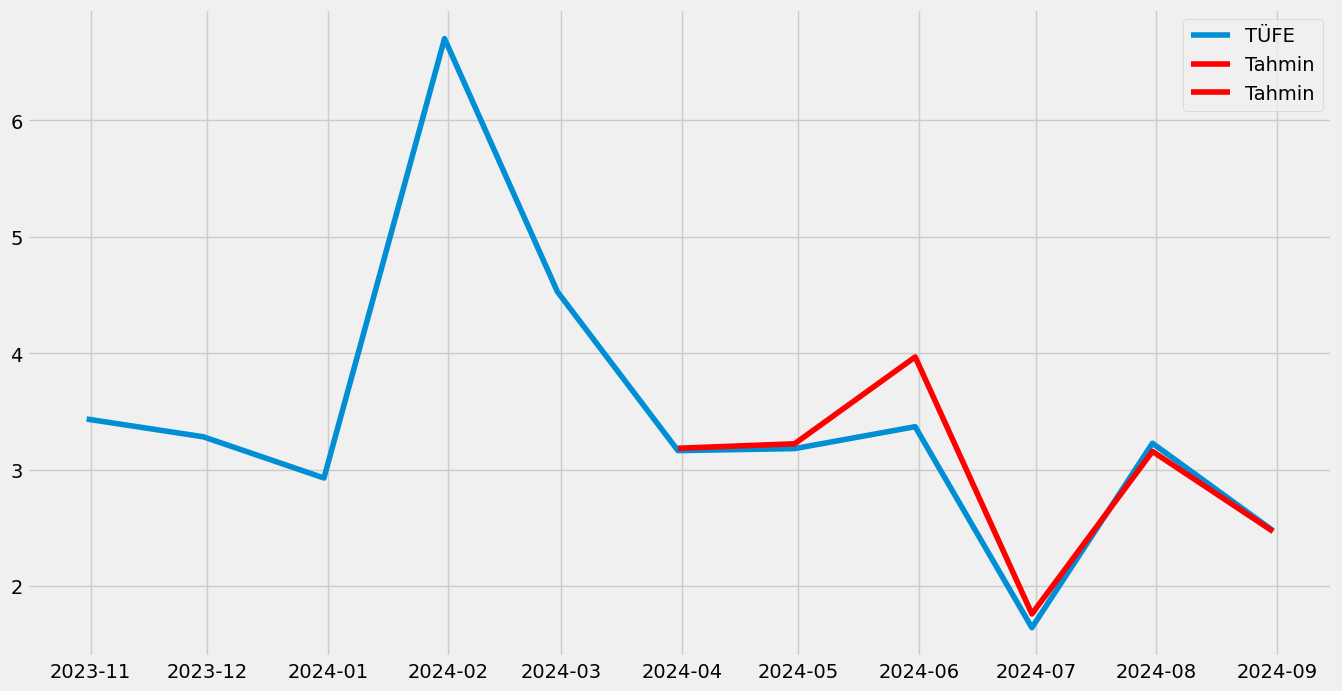

In [68]:
plt.figure(figsize=(15,8))
plt.plot(kısatahminler["TÜFE"].iloc[2:-1],label="TÜFE")
plt.plot(kısatahminler["Ortalama"].iloc[:8],label="Tahmin",color="red")
plt.plot(kısatahminler["Ensemble"].iloc[7:-1],label="Tahmin",color="red")
plt.legend()

## Orta Vadeli Tahminler

In [30]:
model=auto_arima(pfaiz["Faiz"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Faiz"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Faiz"]
row=pd.DataFrame({"Faiz":pfaiz.iloc[-4:,0]},index=pd.date_range(start="2024-05-30",periods=4,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)

faiztahmin.iloc[4:,0]=[50,50,50,50,50,50,50,50,50,50,50,45,40,35,35,35,35,30,30,30,30,30,25,25,25]
faiztahmin

,Faiz
2024-05-31,NaN
2024-06-30,50.106471
2024-07-31,50.000000
2024-08-31,50.337619
2024-10-31,50.000000
2024-11-30,50.000000
2024-12-31,50.000000
2025-01-31,50.000000
2025-02-28,50.000000
2025-03-31,50.000000


In [45]:
enf=pd.read_csv("C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv")
enf=enf.set_index(pd.to_datetime(enf["Unnamed: 0"]))
enf=enf["Ortalama"].loc["2024-05-31":]
faiztahmin.iloc[:4]=50
faiztahmin["Enflasyon"]=enf
faiztahmin["Faiz"].loc["2025-02-28":"2025-12-31"]=[47.5,45,42.5,40,37.5,35,32.5,30,30,30,30]
faiztahmin

,Faiz,Enflasyon
2024-05-31,50.0,75.445948
2024-06-30,50.0,71.597156
2024-07-31,50.0,61.781003
2024-08-31,50.0,51.974528
2024-10-31,50.0,45.837437
2024-11-30,50.0,43.051346
2024-12-31,50.0,41.749084
2025-01-31,50.0,37.976562
2025-02-28,47.5,34.755796
2025-03-31,45.0,33.271560


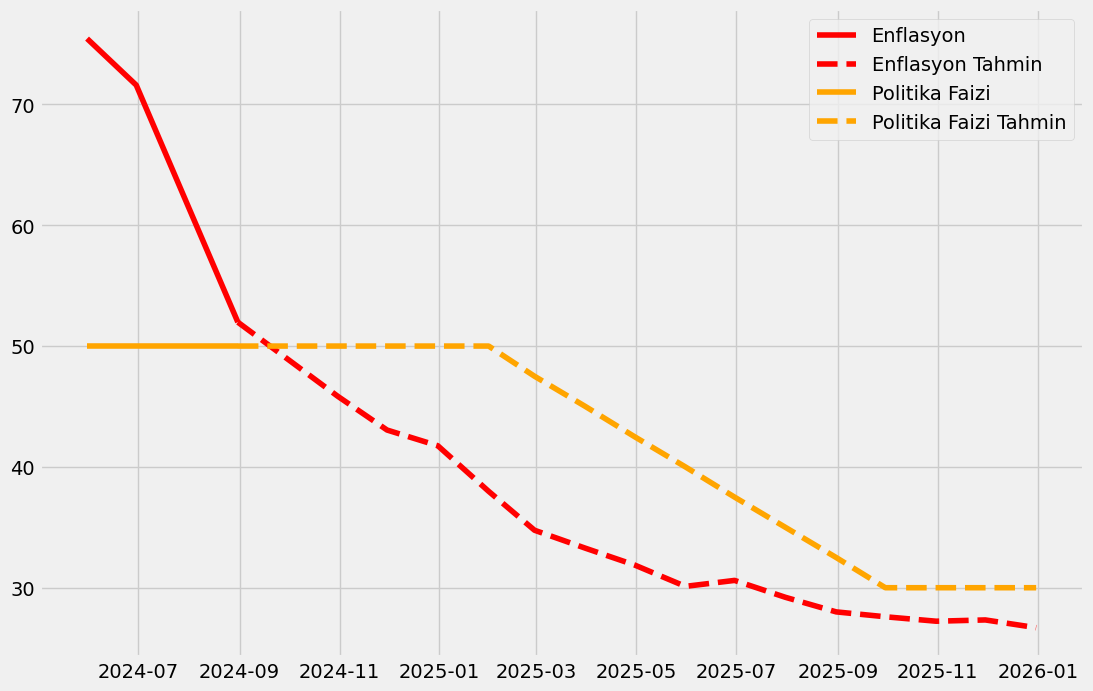

In [61]:
plt.figure(figsize=(12,8))
plt.plot(faiztahmin["Enflasyon"].loc[:"2024-09-30"],color="red",label="Enflasyon")
plt.plot(faiztahmin["Enflasyon"].loc["2024-08-30":"2025-12-31"],"--",color="red",label="Enflasyon Tahmin")
plt.plot(faiztahmin["Faiz"].loc[:"2024-09-30"],color="orange",label="Politika Faizi")
plt.plot(faiztahmin["Faiz"].loc["2024-08-30":"2025-12-31"],"--",color="orange",label="Politika Faizi Tahmin")
plt.legend()

In [68]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [69]:
exog=pd.DataFrame()
exog["X"]=usd["USD/TL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.454046
2007-08-31,92.519699
2007-09-30,99.580871
2007-10-31,101.824103
2007-11-30,110.143119
...,...
2024-05-31,2679.695793
2024-06-30,2684.339030
2024-07-31,2738.228154
2024-08-31,2623.214664


In [70]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,20]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [71]:
faiztahmin.columns=["Faiz"]


In [72]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Faiz"].iloc[95:-13]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Faiz"].iloc[-14:-3],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [73]:
exog=pfaiz["Faiz"].iloc[36:-2]
exog=np.array(exog).reshape(-1,1)

In [74]:
exogtest=faiztahmin.iloc[1:]
exogtest=np.array(exogtest).reshape(-1,1)

In [75]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(28,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-08-31,8.799174
2024-09-30,8.800000
2024-10-31,8.797381
2024-11-30,8.800000
2024-12-31,8.800000
2025-01-31,8.800000
2025-02-28,8.800000
2025-03-31,8.800000
2025-04-30,8.800000
2025-05-31,8.800000


In [76]:
from prophet import Prophet

In [77]:
import optuna


In [78]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.01, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.50,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=usd.index
    sn["y"]=usd.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=500,freq="D")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(usd.values,predictions["yhat"][:-500])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.01, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.50,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=usd.index\n    sn["y"]=usd.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],sea

In [79]:
"""study.best_params"""

'study.best_params'

In [80]:
sn=pd.DataFrame()
sn["ds"]=usd.index
sn["y"]=usd.values
prophet=Prophet(growth="linear",changepoint_prior_scale=8.828175414699565,changepoint_range=0.950080828826867,seasonality_prior_scale=7.816953755754968,n_changepoints=100,interval_width=0.70,yearly_seasonality=False,weekly_seasonality="auto")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=500,freq="D")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

11:10:30 - cmdstanpy - INFO - Chain [1] start processing
11:10:31 - cmdstanpy - INFO - Chain [1] done processing


In [81]:
(predictions["yhat"].resample('M').mean().tail(19).pct_change()*100).dropna()

ds
2024-09-30    1.653140
2024-10-31    0.867336
2024-11-30    1.639143
2024-12-31    1.612709
2025-01-31    1.613131
2025-02-28    1.510707
2025-03-31    1.488224
2025-04-30    1.516109
2025-05-31    1.493467
2025-06-30    1.471491
2025-07-31    1.450152
2025-08-31    1.452856
2025-09-30    1.408953
2025-10-31    1.389377
2025-11-30    1.370338
2025-12-31    1.351814
2026-01-31    1.355649
2026-02-28    0.927633
Freq: ME, Name: yhat, dtype: float64

In [82]:
usdtahmin=(predictions["yhat"].resample('M').mean().tail(19).pct_change()*100).dropna()
usdtahmin

ds
2024-09-30    1.653140
2024-10-31    0.867336
2024-11-30    1.639143
2024-12-31    1.612709
2025-01-31    1.613131
2025-02-28    1.510707
2025-03-31    1.488224
2025-04-30    1.516109
2025-05-31    1.493467
2025-06-30    1.471491
2025-07-31    1.450152
2025-08-31    1.452856
2025-09-30    1.408953
2025-10-31    1.389377
2025-11-30    1.370338
2025-12-31    1.351814
2026-01-31    1.355649
2026-02-28    0.927633
Freq: ME, Name: yhat, dtype: float64

In [83]:
usd_aylık=usd.resample('M').mean().dropna()

In [84]:
usdtahmin1 = []
result = usd_aylık.iloc[-2,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([usd_aylık["USD/TL"].loc["2024-03-31":"2024-08-31"],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2024-03-31", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2024-03-31,31.986743
2024-04-30,32.329467
2024-05-31,32.247882
2024-06-30,32.521235
2024-07-31,32.894495
2024-08-31,33.621248
2024-09-30,34.177054
2024-10-31,34.473484
2024-11-30,35.038554
2024-12-31,35.603624


In [85]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df14[50:].index\n    sn["y"]=df14[50:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = optuna.create_study(direction=

In [86]:
"""study.best_params"""

'study.best_params'

In [87]:
sn=pd.DataFrame()
sn["ds"]=df14.index
sn["y"]=df14.values
prophet=Prophet(growth="linear",changepoint_prior_scale=10.333547662504625,changepoint_range=0.8962159367416,seasonality_prior_scale=2.378940289163559,n_changepoints=98)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

11:10:31 - cmdstanpy - INFO - Chain [1] start processing
11:10:32 - cmdstanpy - INFO - Chain [1] done processing


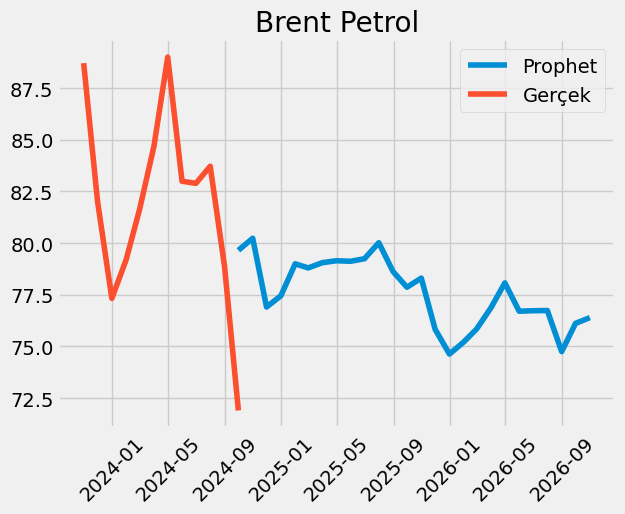

In [88]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-26:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [89]:
brenttahmin=predictions["yhat"][-29:]
brenttahmin

ds
2024-06-30    81.731953
2024-07-31    83.278260
2024-08-31    82.513467
2024-09-30    79.651199
2024-10-31    80.234420
2024-11-30    76.907077
2024-12-31    77.452867
2025-01-31    78.998651
2025-02-28    78.798412
2025-03-31    79.053977
2025-04-30    79.145951
2025-05-31    79.121231
2025-06-30    79.243505
2025-07-31    80.017548
2025-08-31    78.619558
2025-09-30    77.864625
2025-10-31    78.307016
2025-11-30    75.830432
2025-12-31    74.630500
2026-01-31    75.216960
2026-02-28    75.849445
2026-03-31    76.877409
2026-04-30    78.075635
2026-05-31    76.704411
2026-06-30    76.728727
2026-07-31    76.737697
2026-08-31    74.750541
2026-09-30    76.116954
2026-10-31    76.394476
Name: yhat, dtype: float64

In [90]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = o

11:10:32 - cmdstanpy - INFO - Chain [1] start processing
11:10:33 - cmdstanpy - INFO - Chain [1] done processing


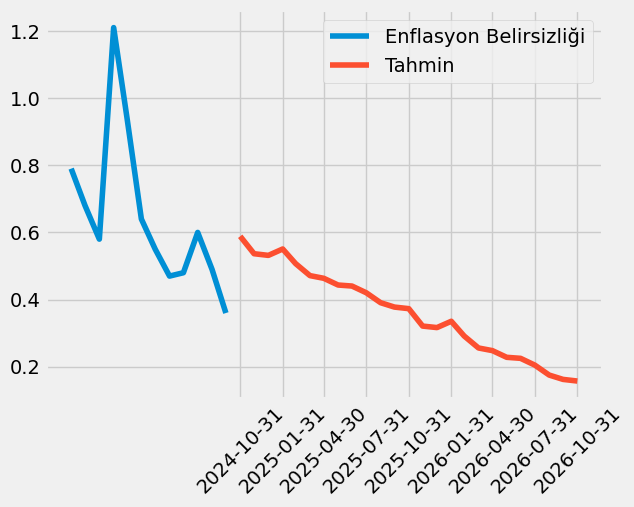

In [91]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
prophet=Prophet(changepoint_prior_scale=10,changepoint_range=0.78,seasonality_prior_scale=0.003403857042852,n_changepoints=6,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()

In [92]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-09-30,0.360000
2024-10-31,0.588549
2024-11-30,0.536624
2024-12-31,0.531691
2025-01-31,0.550686
2025-02-28,0.507141
2025-03-31,0.471415
2025-04-30,0.463402
2025-05-31,0.443400


In [93]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [94]:
#study.best_params

In [95]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2024-07-31    1.891924
2024-08-31   -0.918359
2024-09-30   -3.468849
2024-10-31    0.732218
2024-11-30   -4.147027
2024-12-31    0.709674
2025-01-31    1.995774
2025-02-28   -0.253471
2025-03-31    0.324327
2025-04-30    0.116344
2025-05-31   -0.031233
2025-06-30    0.154540
2025-07-31    0.976790
2025-08-31   -1.747103
2025-09-30   -0.960237
2025-10-31    0.568155
2025-11-30   -3.162660
2025-12-31   -1.582388
2026-01-31    0.785817
2026-02-28    0.840881
2026-03-31    1.355268
2026-04-30    1.558620
2026-05-31   -1.756276
2026-06-30    0.031701
2026-07-31    0.011690
2026-08-31   -2.589544
2026-09-30    1.827965
2026-10-31    0.364600
Name: yhat, dtype: float64

In [96]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[3:].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1[:-8]).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2024-07-30",periods=len(motorintahmin),freq="1M"))
motorintahmin=(motorintahmin-1)*100
motorintahmin

,Motorin
2024-07-31,3.061381
2024-08-31,1.270694
2024-09-30,-1.873053
2024-10-31,1.605906
2024-11-30,-2.575859
2024-12-31,2.333828
2025-01-31,3.641099
2025-02-28,1.253407
2025-03-31,1.817378
2025-04-30,1.634217


In [97]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [98]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=0.904897796889,changepoint_range=0.9529543315216538,growth='linear',seasonality_prior_scale=3.03031163229546,n_changepoints=15)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

11:10:33 - cmdstanpy - INFO - Chain [1] start processing
11:10:33 - cmdstanpy - INFO - Chain [1] done processing


In [99]:
paraarzitahmin=(predictions["yhat"]).tail(26)
paraarzitahmin

ds
2024-09-30    3.137780
2024-10-31    3.219954
2024-11-30    2.887265
2024-12-31    2.922005
2025-01-31    1.464740
2025-02-28    1.815674
2025-03-31    3.504055
2025-04-30    3.032434
2025-05-31    2.614955
2025-06-30    3.006456
2025-07-31    2.177120
2025-08-31    2.383766
2025-09-30    2.259473
2025-10-31    2.109443
2025-11-30    2.070969
2025-12-31    2.756861
2026-01-31    0.880028
2026-02-28    1.468011
2026-03-31    2.865751
2026-04-30    1.824646
2026-05-31    2.051428
2026-06-30    2.682144
2026-07-31    1.382520
2026-08-31    2.547762
2026-09-30    1.362687
2026-10-31    0.997933
Name: yhat, dtype: float64

In [100]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-09-30", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-6:,0]},index=pd.date_range(start="2024-03-31",periods=6,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
np.cumprod(1+(paraarzitahmin1.loc["2024-01-31":"2024-12-31"])/100)

,Para Arzi
2024-03-31,NaN
2024-04-30,1.019822
2024-05-31,1.038785
2024-06-30,1.070273
2024-07-31,1.096467
2024-08-31,1.138198
2024-09-30,1.173912
2024-10-31,1.211711
2024-11-30,1.246697
2024-12-31,1.283125


In [101]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [102]:
#study.best_params

In [103]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,5),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,5),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=

In [104]:
"""study.best_params"""

'study.best_params'

In [105]:
sn=pd.DataFrame()
sn["ds"]=kredi["Kredi"].index
sn["y"]=kredi["Kredi"].values
prophet=Prophet(changepoint_prior_scale=0.01099759561372614,changepoint_range=0.0589785485153,growth="linear",seasonality_prior_scale=0.04157847860739,n_changepoints=10,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

11:10:34 - cmdstanpy - INFO - Chain [1] start processing
11:10:34 - cmdstanpy - INFO - Chain [1] done processing


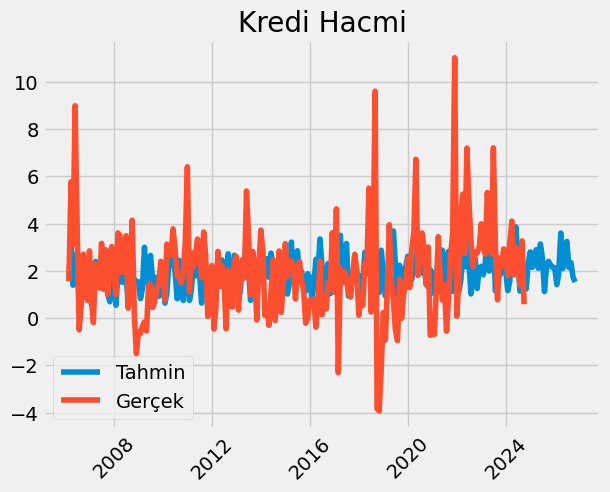

In [106]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(kredi["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [107]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-10-31    1.233718
2024-11-30    2.329976
2024-12-31    2.807268
2025-01-31    2.152674
2025-02-28    2.571952
2025-03-31    2.901534
2025-04-30    2.114970
2025-05-31    3.143125
2025-06-30    2.555756
2025-07-31    1.129548
2025-08-31    2.217195
2025-09-30    2.406552
2025-10-31    2.249800
2025-11-30    2.149607
2025-12-31    2.138112
2026-01-31    1.420683
2026-02-28    1.852602
2026-03-31    3.605202
2026-04-30    2.098542
2026-05-31    2.962180
2026-06-30    3.250114
2026-07-31    2.143627
2026-08-31    2.345634
2026-09-30    1.738747
2026-10-31    1.531271
Name: yhat, dtype: float64

In [108]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-10-30", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":kredi.iloc[-4:,0]},index=pd.date_range(start="2024-06-30",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2024-06-30,2.281882
2024-07-31,1.391026
2024-08-31,3.273183
2024-09-30,0.590000
2024-10-31,1.233718
2024-11-30,2.329976
2024-12-31,2.807268
2025-01-31,2.152674
2025-02-28,2.571952
2025-03-31,2.901534


In [109]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,150),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3"].index
    sn["y"]=m3["M3"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3"],predictions["yhat"][:-12])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,150),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3"].index\n    sn["y"]=m3["M3"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["

In [110]:
sn=pd.DataFrame()
sn["ds"]=m3["M3"].index
sn["y"]=m3["M3"].values
prophet=Prophet(changepoint_prior_scale=2.5,changepoint_range=0.9,growth='linear',seasonality_prior_scale=4.7636997959024185,n_changepoints=10)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=18,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

11:10:34 - cmdstanpy - INFO - Chain [1] start processing
11:10:34 - cmdstanpy - INFO - Chain [1] done processing


In [111]:
m3tahmin=(predictions["yhat"].tail(18))


m3tahmin1 = np.array(m3tahmin).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-10-30", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2024-06-30",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2024-06-30,3.080662
2024-07-31,3.027772
2024-08-31,3.966110
2024-09-30,1.730000
2024-10-31,3.355940
2024-11-30,2.938479
2024-12-31,2.184655
2025-01-31,1.195533
2025-02-28,1.706706
2025-03-31,3.124700


In [112]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [113]:
#study.best_params

In [114]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [115]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean()],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["M3"]=m3tahmin1["M3"].shift(1)
tahmindf["Para Arzi"]=paraarzitahmin1.rolling(3).mean()
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].shift(1).rolling(2).mean()
tahmindf["Kredi2"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"].rolling(2).mean()
tahmindf["Motorin2"]=motorintahmin["Motorin"]
tahmindf["İşsizlik"]=issizliktahmin





tahmindf=tahmindf[['USD/TL', 'Motorin','Motorin2', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'M3', 'Kredi','Kredi2','İşsizlik']]

tahmindf.columns=["USD/TL","Motorin","Motorin2","Zam","Enflasyon Belirsizliği",'ParaArzi','M3', 'Kredi','Kredi2','İşsizlik']
tahmindf=tahmindf.loc["2024-09-30":]


tahmindf=tahmindf.loc["2024-08-31":]
tahmindf["Motorin"].iloc[0]=data["Motorin"].iloc[-1]
tahmindf["ParaArzi"].iloc[0]=data["ParaArzi"].iloc[-1]
tahmindf["M3"].iloc[0]=data["M3"].iloc[-1]
tahmindf["Kredi"].iloc[0]=data["Kredi"].iloc[-1]
tahmindf["Enflasyon Belirsizliği"].iloc[0]=data["Enflasyon Belirsizliği"].iloc[-1]
tahmindf["Zam"].iloc[-1]=0
tahmindf

,USD/TL,Motorin,Motorin2,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Kredi,Kredi2,İşsizlik
2024-09-30,1.671920,-2.360000,-1.873053,0.0,0.360000,2.714450,2.907961,2.332104,1.751403,8.800000
2024-10-31,1.568125,-0.133574,1.605906,0.0,0.588549,3.387883,1.730000,1.931591,1.698967,8.797381
2024-11-30,1.385823,-0.484977,-2.575859,0.0,0.536624,3.081666,3.355940,0.911859,1.384565,8.800000
2024-12-31,1.375815,-0.121016,2.333828,0.0,0.531691,3.009741,2.938479,1.781847,2.123654,8.800000
2025-01-31,1.621521,2.987463,3.641099,25.0,0.550686,2.424670,2.184655,2.568622,2.429973,8.800000
2025-02-28,1.578303,2.447253,1.253407,0.0,0.507141,2.067473,1.195533,2.479971,2.510631,8.800000
2025-03-31,1.536706,1.535393,1.817378,0.0,0.471415,2.261490,1.706706,2.362313,2.542053,8.800000
2025-04-30,1.505040,1.725798,1.634217,0.0,0.463402,2.784055,3.124700,2.736743,2.529485,8.800000
2025-05-31,1.499291,1.547992,1.461767,0.0,0.443400,3.050481,2.675893,2.508252,2.719876,8.800000
2025-06-30,1.493467,1.545036,1.628305,0.0,0.440387,2.884615,2.555646,2.629048,2.604617,8.800000


In [116]:
features=['USD/TL', 'Motorin', 'M3', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İhracat', 'İthalat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','Anket','ParaArzi','Zam', 'TÜFE']

data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,TÜFEt-1,Kredi,İhracat,İthalat,İşsizlik,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,Anket,ParaArzi,Zam,TÜFE
0,0.239898,0.042040,-0.272470,-0.550369,0.037740,0.795636,-0.562768,-1.368187,-0.987149,-0.385268,-0.898194,0.364605,-0.713312,-0.653956,-0.234411,-0.286359,-0.657717
1,0.068586,-0.367053,-0.799395,-0.935748,-0.655187,-0.291230,0.283711,-0.645125,-0.987149,0.365235,-0.700480,-0.292044,-0.528106,-0.683832,-0.696956,-0.286359,-0.346209
2,-1.081287,-0.993391,-1.202340,-0.755905,-0.343385,-0.962808,0.858549,1.092309,-0.856752,-0.291254,-0.515641,-0.511703,-0.294051,-0.601672,-1.085761,-0.286359,-0.248228
3,-1.236693,-0.857305,-1.346608,-0.678829,-0.245312,-1.089700,-0.694908,-0.008061,-0.856752,-0.510859,-0.282049,-0.732472,0.140697,-0.698771,-1.303271,-0.286359,-0.672443
4,-1.154039,-0.146630,-0.956360,-0.524677,-0.669926,-0.918881,0.039103,-0.044329,-0.856752,-0.731575,0.151836,-0.938215,-0.149935,-1.005004,-0.953254,-0.286359,-0.710156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,-0.203078,-0.461713,0.328733,-0.139298,0.574990,0.619349,-1.212762,-0.291290,-1.639136,0.357021,0.813075,0.460803,0.821061,1.101286,-0.125547,-0.286359,0.655410
124,-0.508468,-0.555450,0.405876,-0.113607,0.659178,0.284751,1.826607,0.382526,-1.182745,0.461410,0.830852,-0.097241,0.914546,0.712892,-0.011716,-0.286359,-0.116104
125,-0.499897,0.425887,0.528164,0.194697,-0.113063,0.420115,-1.713409,-1.736647,-1.443540,-0.096498,0.924151,-0.294538,-0.044313,0.899620,0.071738,-0.286359,0.591757
126,-0.251150,0.268859,0.605944,-0.087915,0.595465,-0.063144,1.514496,1.618155,-1.704335,-0.102561,-0.032807,-0.102770,0.298339,0.735299,0.420914,-0.286359,0.256252


In [117]:
"""import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2,l1
features=['M3','ParaArzi','Enflasyon Belirsizliği','Kredi','İşsizlik']
def weighted_mse(y_true, y_pred):
    n = len(y_true)
    weights = 1 / np.arange(1, n + 1)  # Ters orantılı ağırlıklar
    weights = weights[::-1]  # Ağırlıkları ters çevir (küçükten büyüğe)
    mse = np.sum(weights * (y_true - y_pred) ** 2) / n
    return mse
def objective(trial):
    # Define hyperparameters to be optimized
    selected_features = ["USD/TL","Motorin","Zam"]
    for feature in features:
        if trial.suggest_categorical(feature, (True, False)):
            selected_features.append(feature)

    if len(selected_features) == 0:
        return float('inf')  # Hiçbir özellik seçilmezse, bu deneme geçersiz sayılır
    
    X=scaled_data[selected_features]
    y=scaled_data["TÜFE"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=selected_features)
    y=pd.DataFrame(y,columns=["TÜFE"])
    X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
    y_train,y_test=y[:-7],y[-7:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)


    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 256)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','linear'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) 

    

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns=["TÜFE"]
    tahminler["Tahmin"]=scaler2.inverse_transform(y_pred)
    tahminler=tahminler.set_index(data.index[-7:])
    tahminler.loc["2024-05-31","Tahmin"]+=0.66
    tahminler.loc["2024-07-31","Tahmin"]+=0.67
    mse=mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["Tahmin"].iloc[:-1])


    return mse # Return validation accuracy as the objective

study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)"""

'import optuna\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN\nimport keras\nfrom keras.callbacks import EarlyStopping\nfrom keras import regularizers\nfrom keras.layers import LSTM, Dense, Dropout\nfrom keras.regularizers import l2,l1\nfeatures=[\'M3\',\'ParaArzi\',\'Enflasyon Belirsizliği\',\'Kredi\',\'İşsizlik\']\ndef weighted_mse(y_true, y_pred):\n    n = len(y_true)\n    weights = 1 / np.arange(1, n + 1)  # Ters orantılı ağırlıklar\n    weights = weights[::-1]  # Ağırlıkları ters çevir (küçükten büyüğe)\n    mse = np.sum(weights * (y_true - y_pred) ** 2) / n\n    return mse\ndef objective(trial):\n    # Define hyperparameters to be optimized\n    selected_features = ["USD/TL","Motorin","Zam"]\n    for feature in features:\n        if trial.suggest_categorical(feature, (True, False)):\n            selected_features.append(feature)\n\n    if len(selected_features) == 0:\n        return float(\'i

In [118]:
trials=pd.read_excel("futuretrial2.xlsx")
del trials["Unnamed: 0"]
predictions=pd.DataFrame()
for i in range(10):
    features=['USD/TL', 'Motorin2', 'M3', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İhracat', 'İthalat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','Anket','ParaArzi','Zam', 'TÜFE']

    data1=data[features]
    from sklearn.preprocessing import StandardScaler
    scaler1 = StandardScaler()
    scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
    scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
    scaler2 = StandardScaler()
    scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
    trial=trials.iloc[i:i+1,:]
    true_columns = trial.columns[trial.any()]
    cleaned_column_names = [name.replace('params_', '') if name.startswith('params_') else name for name in true_columns]
    columns_to_drop = [
        'number', 'value', 'datetime_start', 'datetime_complete', 'duration',
        'activation1', 'batch_size', 'learning_rate', 'optimizer', 'rlrate', 
        'units1', 'state'
    ]


    features = [col for col in cleaned_column_names if col not in columns_to_drop]
    features.append("USD/TL")
    features.append("Motorin2")
    features.append("Zam")



    units=int(trial["params_units1"].values[0])
    activation=trial["params_activation1"].values[0]
    rl=trial["params_rlrate"].values[0]
    lr=trial["params_learning_rate"].values[0]
    batch=int(trial["params_batch_size"].values[0])
    X=scaled_data[features]
    y=scaled_data["TÜFE"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=features)
    y=pd.DataFrame(y,columns=["TÜFE"])
    X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
    y_train,y_test=y[:-7],y[-7:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units,activation=activation,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rl)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=batch,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))

    features.append("TÜFE")
    data1=pd.concat([data,tahmindf],axis=0)
    data1=data1[features]
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
    scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
    scaler = StandardScaler()
    scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))

    X=scaled_data.iloc[:,:-1]
    y=scaled_data["TÜFE"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
    y=pd.DataFrame(y,columns=["TÜFE"])
    X_test=scaled_data.iloc[-len(tahmindf):,:-1]


    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["TÜFE"]
    pred=pred.set_index(pd.date_range(start="2024-09-30",periods=len(tahmindf),freq="1M"))
    pred.iloc[0]=kısatahminler["Ensemble"].iloc[-1]
    predictions=pd.concat([predictions,pred["TÜFE"]],axis=1)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - loss: 10.1194 - mean_squared_error: 2.7274 - val_loss: 3.3247 - val_mean_squared_error: 1.5163
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.3834 - mean_squared_error: 2.7375 - val_loss: 2.3862 - val_mean_squared_error: 0.5271
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.0595 - mean_squared_error: 1.2067 - val_loss: 2.1090 - val_mean_squared_error: 0.5476
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5053 - mean_squared_error: 1.0477 - val_loss: 1.3910 - val_mean_squared_error: 0.4368
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.3420 - mean_squared_error: 0.4120 - val_loss: 0.9484 - val_mean_squared_error: 0.0914
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.1124 - mean_squared_error: 0.3005 - val_loss: 1.0276 - val_mean_squared_error: 0.4271
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 10.0242 - mean_squ

In [119]:
predictions=predictions.iloc[:,[0,1,2,6,7,8,9]]

In [120]:
def create_tüfe(data):
    tüfetahmin = []
    result = enf["TÜFE"].iloc[-1]
    pred=np.array(data.values).reshape(1,-1).ravel()
    for i in range(len(pred)):
        result *= (1 + (pred[i] / 100))
        tüfetahmin.append(result)
    tüfetahmin[0]=enf["TÜFE"].iloc[-1]*(1+(data[0]/100))

    tüfetahmin = np.array(tüfetahmin).reshape(-1, 1)
    tüfetahmin = pd.DataFrame(tüfetahmin)
    tüfetahmin = tüfetahmin.set_index(pd.date_range(start="2024-09-30", periods=len(tüfetahmin), freq="1M"))
    return tüfetahmin


In [121]:
tüfetahmin_dict={}
for i in range(len(predictions.columns)):
    # Dinamik olarak bir sözlük içinde tahminleri saklıyoruz.
    tüfetahmin_dict[f"tüfetahmin_{i}"] = create_tüfe(predictions.iloc[:, i])
    # Kolon adını güncelleme
    tüfetahmin_dict[f"tüfetahmin_{i}"].columns = [f"NN_{i}"]




In [122]:
tüfetahmin=pd.concat(tüfetahmin_dict.values(), axis=1)


In [123]:
std=tüfetahmin.std(axis=1)

In [124]:
predictions.columns=tüfetahmin.columns

In [125]:
dates=pd.date_range('2006-02-28','2024-03-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=enf["TÜFE"]
df=df.set_index(pd.to_datetime(enf.index))




dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.mean(axis=1)],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=["Ortalama"]


dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.max(axis=1)],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=["Max"]

dfas2["Max"].loc["2024-09-30":"2024-12-31"]+=(std.loc["2024-09-30":"2024-12-31"])/2
dfas3=pd.DataFrame()
dfas3=pd.concat([df["CPI"],tüfetahmin.min(axis=1)],axis=0)
dfas3=pd.DataFrame(dfas3)
dfas3.columns=["Min"]

dfas0=pd.DataFrame()
for i in range(tüfetahmin.shape[1]):
    dfas00=pd.DataFrame()
    dfas00=pd.concat([df["CPI"],tüfetahmin.iloc[:,i]],axis=0)
    dfas00=pd.DataFrame(dfas00)
    dfas00.columns=[f"NN_{i}"]
    dfas0=pd.concat([dfas0,dfas00],axis=1)



dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas0],axis=1)
dfas=dfas.dropna(axis=0)
dfas=dfas.drop("NN_1",axis=1)
dfas["Ortalama"]=dfas.mean(axis=1)
dfas["Max"]=dfas2["Max"]
dfas["Min"]=dfas3["Min"]
dfas=dfas.pct_change(periods=12)*100
df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)







In [126]:
predictions=predictions[dfas.columns[1:-2]]
predictions["Ortalama"]=predictions.mean(axis=1)

In [127]:
std=predictions.iloc[:,:-1].std(axis=1)

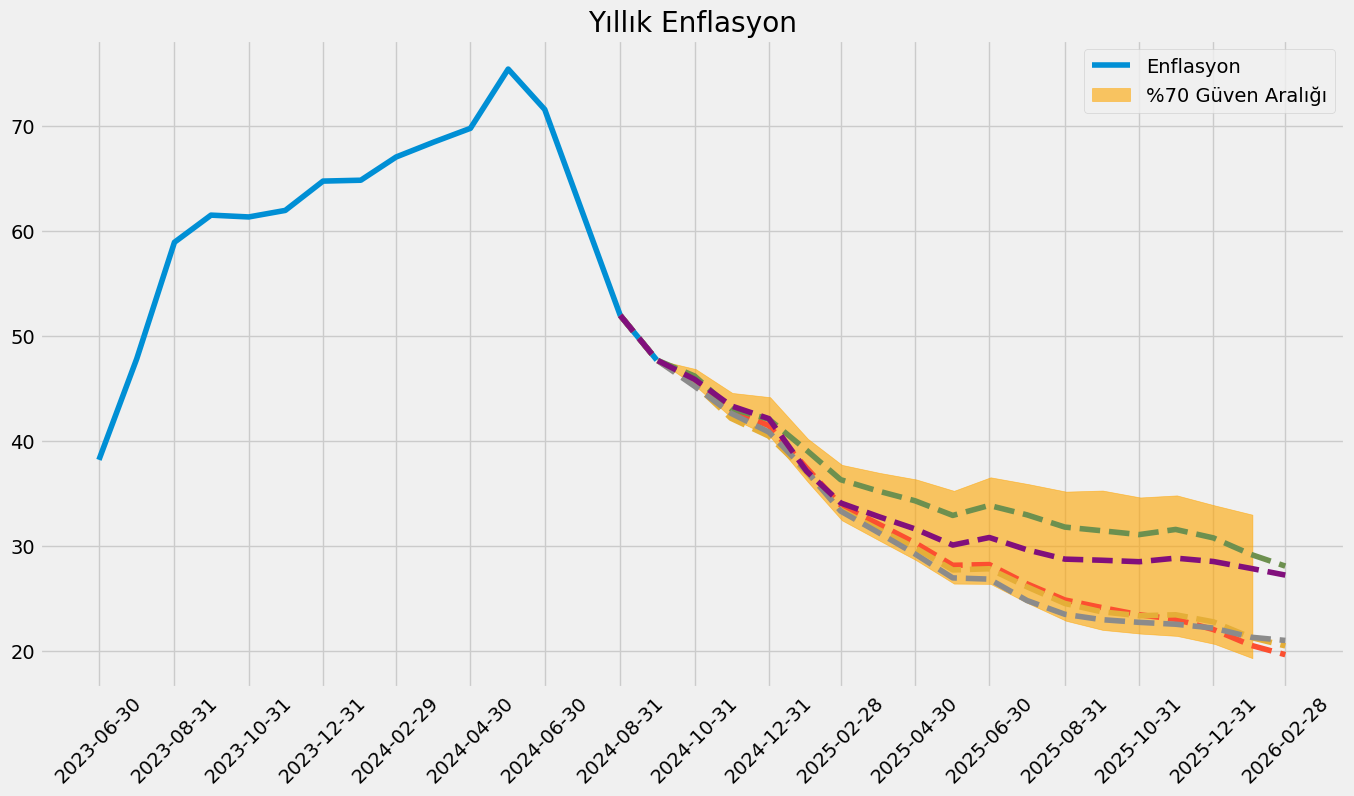

In [128]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.plot(dfas["Ortalama"].loc["2023-06-30":"2024-09-30"],label="Enflasyon")
plt.plot(dfas.iloc[:,1:-3].loc["2024-08-30":],'--')
plt.fill_between(dfas.loc["2024-08-30":].index.strftime("%Y-%m"), dfas["Max"].loc["2024-08-30":].shift(1), dfas["Min"].loc["2024-08-30":].shift(1), alpha=0.6, color='orange',label="%70 Güven Aralığı")
plt.legend(loc=0)
plt.xticks(dfas.loc["2023-06-30":].index[::2],rotation=45)
plt.title("Yıllık Enflasyon")
plt.show()

In [129]:
sonu12024=str(dfas["Ortalama"].loc["2024-12-31"])[:5]
min2024=str(dfas["Min"].loc["2024-12-31"])[:5]
max2024=str(dfas["Max"].loc["2024-12-31"])[:5]

In [130]:
params = {
    'series': "TP.PKAUO.S01.D.U",
    'startDate': "01-09-2024",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ay12sonra = formatted_response['items']
ay12sonra = pd.DataFrame(ay12sonra)


ay12sonra = ay12sonra.drop(columns=['UNIXTIME','Tarih'])
ay12sonra.columns = ['Beklenti']
ay12sonra['Beklenti'] = pd.to_numeric(ay12sonra['Beklenti'])
ay12sonra=ay12sonra.set_index(pd.date_range(start="2024-08-01",freq="M",periods=len(ay12sonra)))
ay12sonra=ay12sonra.dropna()
ay12sonra

,Beklenti
2024-08-31,43.14


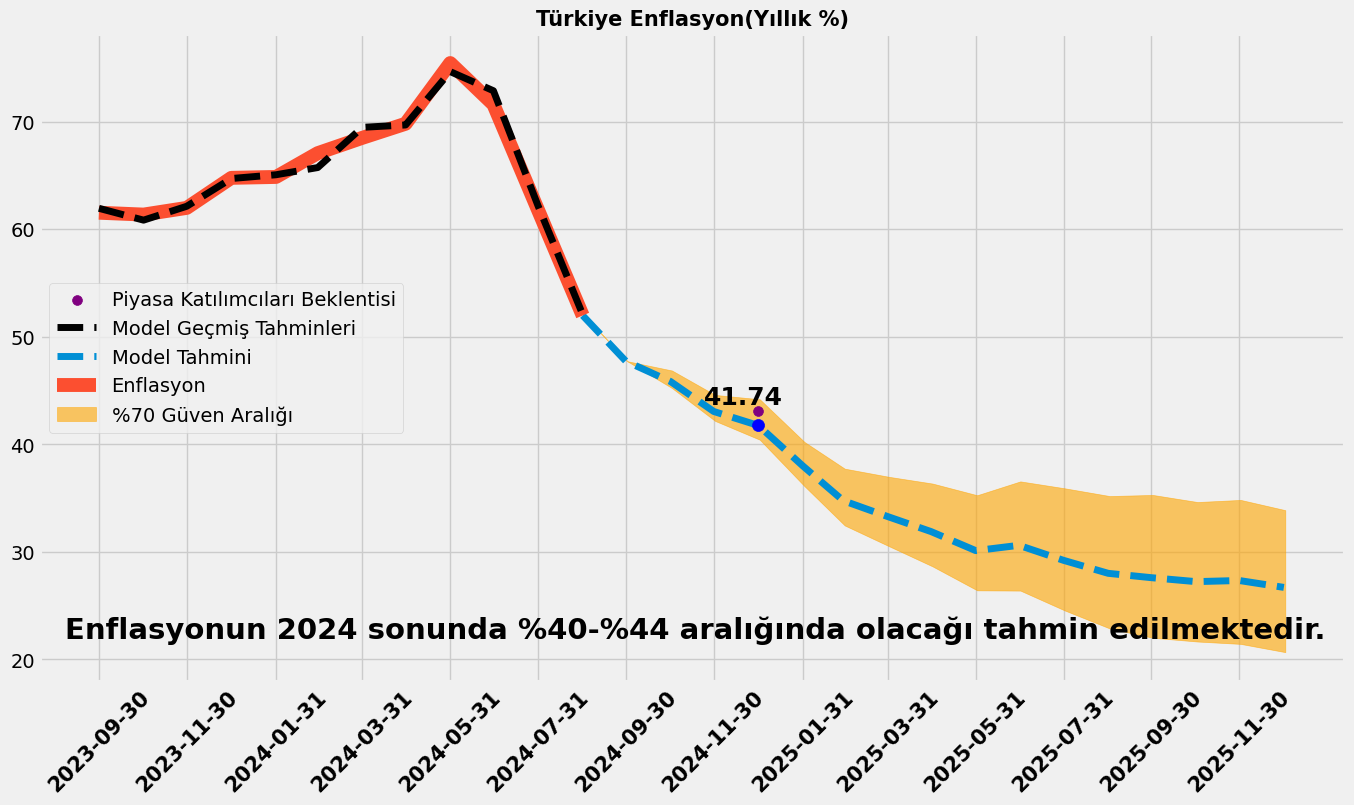

In [131]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,8))
plt.scatter(x=pd.to_datetime("2024-12-31"),y=ay12sonra["Beklenti"].values,color="purple",zorder=3,s=50,label="Piyasa Katılımcıları Beklentisi")
geçmiş=pd.DataFrame({"Tahmin":[61.94,60.84,62.13,64.71,65.06,65.73,69.47,69.69,74.65,72.87,62.17,52.07]})
geçmiş=geçmiş.set_index(pd.date_range(start="2023-09-30",periods=len(geçmiş),freq="M"))
plt.plot(geçmiş["Tahmin"],'--',label="Model Geçmiş Tahminleri",color="black",linewidth=5,zorder=3)
plt.scatter(x=dfas.loc["2024-12-31":].index[0],y=dfas["Ortalama"].loc["2024-12-31"],color='blue',zorder=4,s=75)
plt.plot(dfas["Ortalama"].loc["2024-08-31":"2025-12-31"],'--',label="Model Tahmini",linewidth=5)
plt.plot(dfas["Ortalama"].loc["2023-09-30":"2024-08-31"],label="Enflasyon",linewidth=10)
plt.fill_between(dfas.loc["2024-08-31":"2026-01-31"].index.strftime("%Y-%m"), dfas["Max"].loc["2024-08-31":"2026-01-31"].shift(1), dfas["Min"].loc["2024-08-31":"2026-01-31"].shift(1), alpha=0.6, color='orange',label="%70 Güven Aralığı")
annotation_date = mdates.datestr2num('2024-11')
plt.text(mdates.datestr2num('2025-01'), float(sonu12024)+2, sonu12024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 22, f"Enflasyonun 2024 sonunda %{min2024[:2]}-%{max2024[:2]} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='center',fontweight='bold')
plt.xticks(dfas.loc["2023-09-30":"2025-12-31"].index[::2],rotation=45,fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=6)
plt.savefig('forecast.png', bbox_inches='tight')
plt.savefig("./forecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

In [132]:
predictions.columns=["NN1","NN2","NN3","NN4","NN5","NN6","Ortalama"]

In [133]:
modelaylık=kısatahminler.iloc[-1:,1:-2]
modelaylık["Ortalama"]=kısatahminler["Ortalama"].iloc[-1]
modelaylık["Ensemble"]=kısatahminler["Ensemble"].iloc[-1]
modelaylık

,NN1,NN2,NN3,NN4,NN5,NN6,NN7,Ortalama,Ensemble
2024-09-30,1.522166,1.932795,2.066991,1.604435,2.00996,1.781096,2.022557,1.848572,1.82272


In [134]:

aylık=pd.concat([data["TÜFE"][:-1],predictions["Ortalama"]],axis=0)
aylık

2014-02-28    0.428192
2014-03-31    1.125608
2014-04-30    1.344970
2014-05-31    0.395224
2014-06-30    0.310791
                ...   
2025-10-31    1.815667
2025-11-30    1.390519
2025-12-31    1.474088
2026-01-31    2.842300
2026-02-28    1.445972
Length: 145, dtype: float64

In [135]:
aylık.to_csv("C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv")

In [136]:
modelaylık.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [137]:
yıllıktahmin1=dfas


yıllıktahmin1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01'),
  Text(5, 0, '2024-02'),
  Text(6, 0, '2024-03'),
  Text(7, 0, '2024-04'),
  Text(8, 0, '2024-05'),
  Text(9, 0, '2024-06'),
  Text(10, 0, '2024-07'),
  Text(11, 0, '2024-08')])

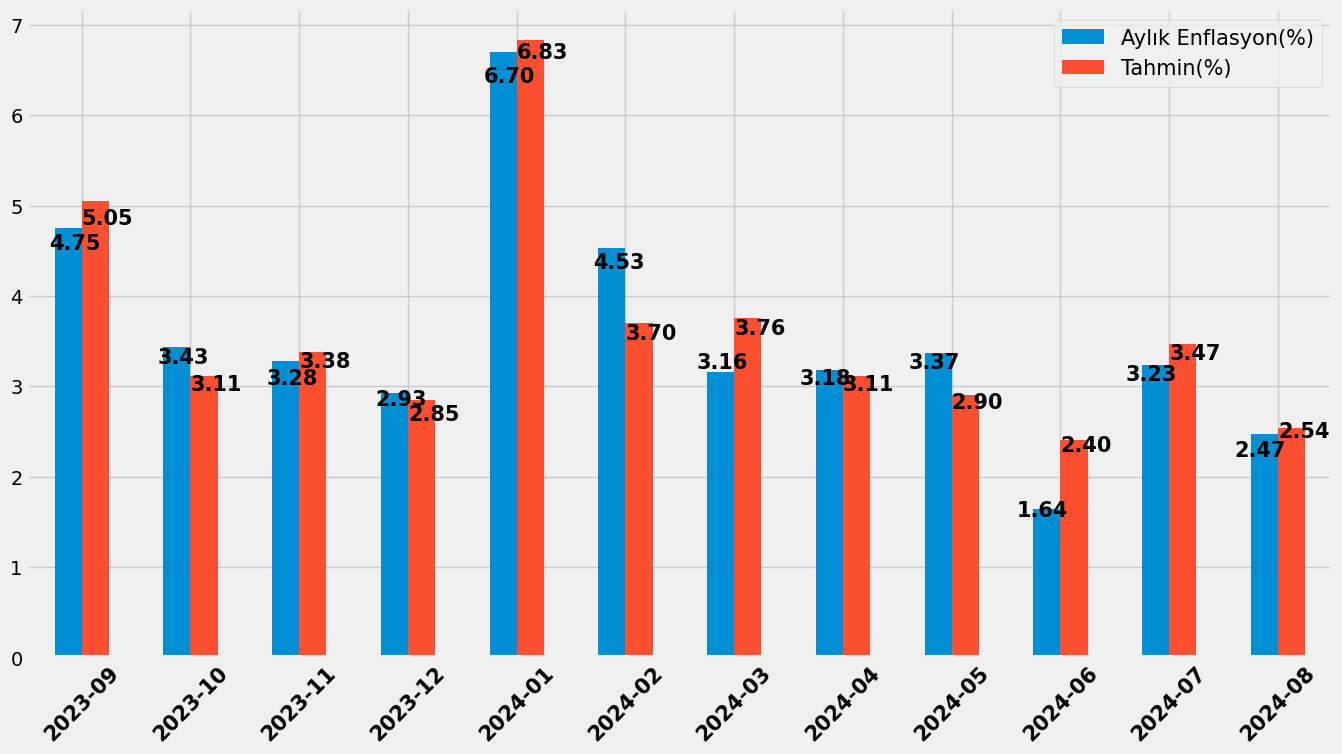

In [138]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70,4.53,3.16,3.18,3.37,1.64,3.23,2.47],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83,3.70,3.76,3.11,2.90,2.40,3.47,2.54]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=12,freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(15,8))
plt.annotate("4.75",xy=(-0.3,gecmis.iloc[0,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,gecmis.iloc[0,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.7,gecmis.iloc[1,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,gecmis.iloc[1,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.7,gecmis.iloc[2,0]*0.92),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,gecmis.iloc[2,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.7,gecmis.iloc[3,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,gecmis.iloc[3,1]*0.92),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.7,gecmis.iloc[4,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,gecmis.iloc[4,1]*0.97),fontweight="bold",fontsize=15)
plt.annotate("4.53",xy=(4.7,gecmis.iloc[5,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.70",xy=(5,gecmis.iloc[5,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.16",xy=(5.65,gecmis.iloc[6,1]*0.85),fontweight="bold",fontsize=15)
plt.annotate("3.76",xy=(6,gecmis.iloc[6,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.18",xy=(6.6,gecmis.iloc[7,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(7,gecmis.iloc[7,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.37",xy=(7.6,gecmis.iloc[8,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.90",xy=(8,gecmis.iloc[8,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("1.64",xy=(8.6,gecmis.iloc[9,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.40",xy=(9,gecmis.iloc[9,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.23",xy=(9.6,gecmis.iloc[10,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.47",xy=(10,gecmis.iloc[10,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.47",xy=(10.6,gecmis.iloc[11,0]*0.90),fontweight="bold",fontsize=15)
plt.annotate("2.54",xy=(11,gecmis.iloc[11,1]*0.96),fontweight="bold",fontsize=15)

plt.legend(fontsize=15)
plt.xticks(rotation=45,fontweight="bold",fontsize=15,color="black")

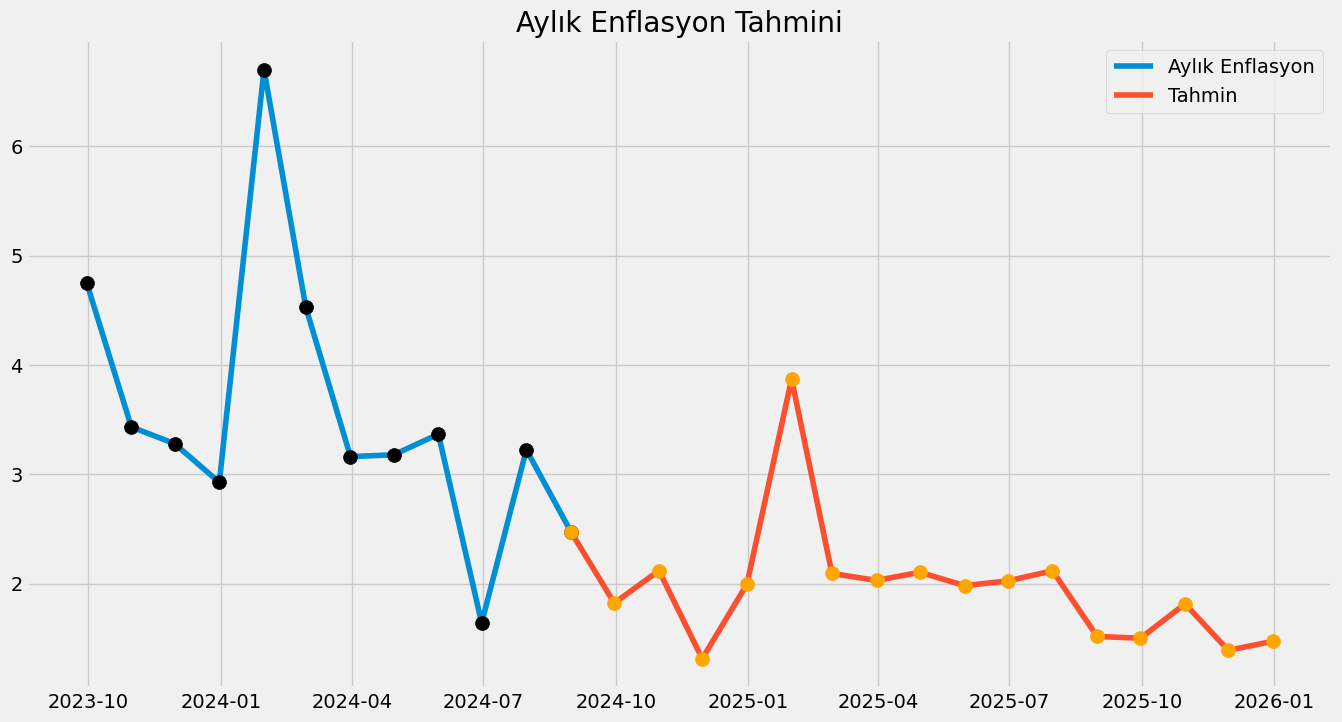

In [139]:
plt.figure(figsize=(15,8))
plt.title("Aylık Enflasyon Tahmini")
plt.plot(aylık.loc["2023-09-30":"2024-08-31"],label="Aylık Enflasyon")
plt.plot(aylık.loc["2024-08-31":"2025-12-31"],label="Tahmin")
plt.scatter(x=aylık.loc["2023-09-30":"2024-08-31"].index,y=aylık.loc["2023-09-30":"2024-08-31"],color="black",s=100,zorder=3)
plt.scatter(x=aylık.loc["2024-08-31":"2025-12-31"].index,y=aylık.loc["2024-08-31":"2025-12-31"],color="orange",s=100,zorder=3)
plt.legend()

findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Fon

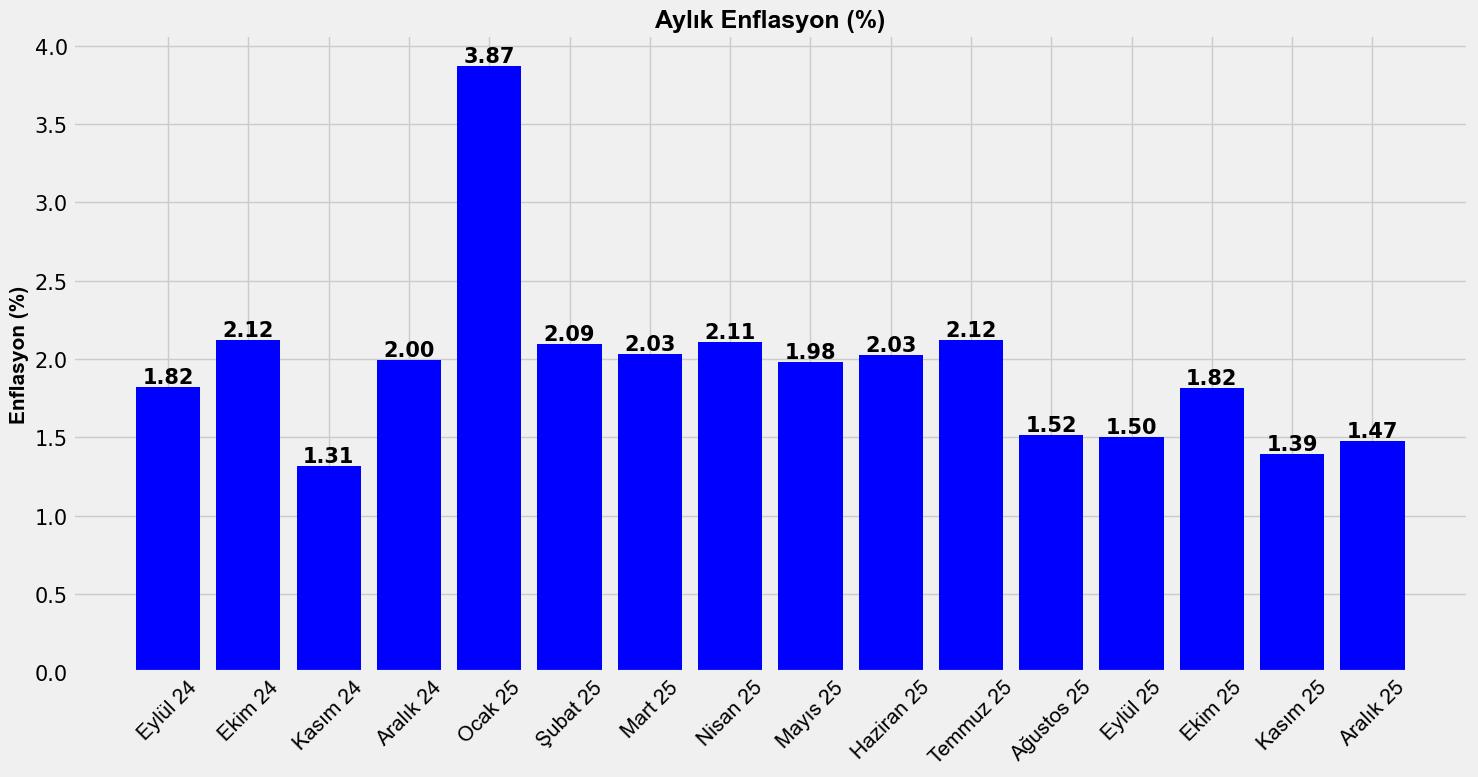

In [140]:

turkish_months = [
    "Eylül 24", "Ekim 24", "Kasım 24", "Aralık 24", "Ocak 25", "Şubat 25",
    "Mart 25", "Nisan 25", "Mayıs 25", "Haziran 25", "Temmuz 25", "Ağustos 25",
    "Eylül 25", "Ekim 25", "Kasım 25", "Aralık 25"
]

# Çubuk grafiği oluşturma
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(
    turkish_months,
    aylık.loc["2024-09-30":"2025-12-31"],
    color='blue'
)

# Barların üstüne değerleri yazma
for bar, value in zip(bars, aylık.loc["2024-09-30":"2025-12-31"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X pozisyonu (barın ortası)
        bar.get_height(),  # Y pozisyonu (barın yüksekliği)
        f'{value:.2f}',  # Yazılacak metin (2 ondalık basamak)
        ha='center',  # Metni ortala
        va='bottom',  # Barın üst kısmına yerleştir
        fontsize=15,
        fontweight='bold',
        color='black',
        family="Arial Black"
    )

# X ekseni ayarları
ax.set_xticks(np.arange(len(turkish_months)))
ax.set_xticklabels(turkish_months, rotation=45, fontsize=15, color="black", fontfamily="Arial")

# Y ekseni ayarları
ax.set_ylabel("Enflasyon (%)", fontsize=15, fontweight='bold', color="black", fontfamily="Arial")
ax.tick_params(axis='y', labelsize=15, labelcolor='black')

# Başlık
ax.set_title("Aylık Enflasyon (%)", fontsize=18, fontweight='bold', color="black", fontfamily="Arial")

# Grafik düzenlemesi
plt.tight_layout()
plt.savefig('forecast.png', bbox_inches='tight')
plt.savefig("./monthlyforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Fon

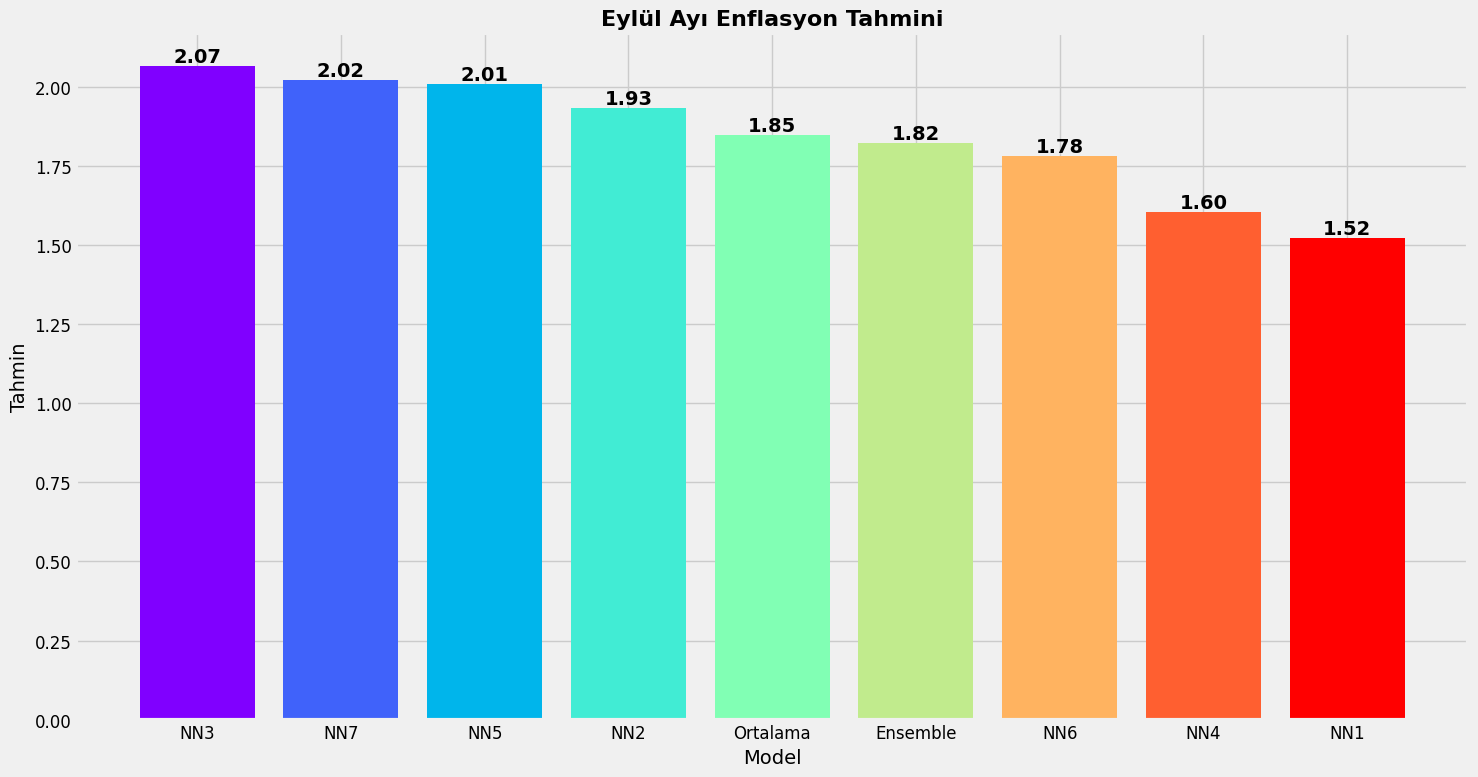

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from matplotlib.colors import Normalize

sorted_index = modelaylık.iloc[0, :].sort_values(ascending=False).index
sorted_modelaylık = modelaylık[sorted_index]

# Renk haritasını oluştur (Viridis yerine Rainbow kullanılacak)
colors = cm.rainbow(np.linspace(0, 1, len(sorted_modelaylık.columns)))

# Çubuk grafiği oluşturma
fig, ax = plt.subplots(figsize=(15, 8))

bars = ax.bar(
    sorted_modelaylık.columns,  # X ekseni
    sorted_modelaylık.iloc[0, :].values,  # Y ekseni
    color=colors  # Renk haritası
)

# Çubukların üzerine metin yerleştirme
for bar, value in zip(bars, sorted_modelaylık.iloc[0, :].values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X pozisyonu
        bar.get_height(),  # Y pozisyonu
        f'{value:.2f}',  # Yazılacak metin
        ha='center',  # Ortala
        va='bottom',  # Çubuğun üstüne yerleştir
        fontsize=14,
        color="black",
        fontweight="bold"
    )

# Başlık ve etiketler
ax.set_title("Eylül Ayı Enflasyon Tahmini", fontsize=16, fontweight='bold', fontfamily="Arial Black", color="black")
ax.set_ylabel("Tahmin", fontsize=14, fontfamily="Arial Black", color="black")
ax.set_xlabel("Model", fontsize=14, fontfamily="Arial Black", color="black")

# Eksendeki yazı tiplerini ayarlama
ax.tick_params(axis='x', labelsize=12, colors="black", labelrotation=0)
ax.tick_params(axis='y', labelsize=12, colors="black")

# Grafik düzenlemesi
plt.tight_layout()
plt.savefig("./monthlymodelforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')


plt.show()

In [142]:
kısatahminler["Ensemble"].iloc[-1]

1.8227199129200122

In [143]:
import pandas as pd
from datetime import datetime

# CSV dosyasını oku
csv_file = "C:/Users/Bora/Documents/GitHub/streamlit-inflation/cariay.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = kısatahminler["Ensemble"].iloc[-1]

try:
    df.loc[today_date] = new_tahmin
except:
    pass

# CSV dosyasını güncelle
df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2024-09-17 tarihli tahmin başarıyla eklendi.


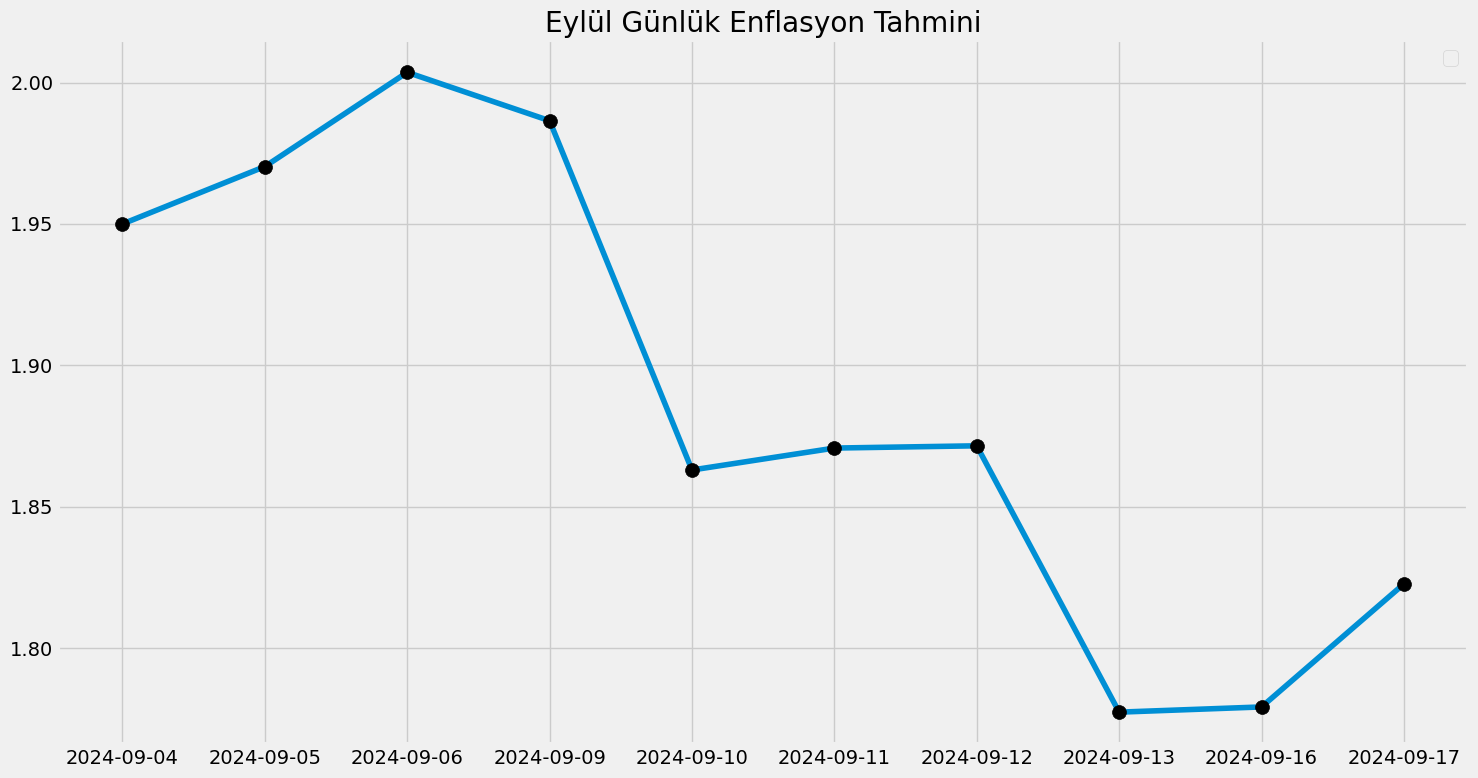

In [144]:
import matplotlib.pyplot as plt
from datetime import date
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Eylül Günlük Enflasyon Tahmini")
plt.plot(df)
plt.scatter(x=df.index,y=df["Tahmin"],color="black",s=100,zorder=3)
plt.legend()
plt.tight_layout()
plt.savefig("./dailyforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')

findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Font family 'Arial Black' not found.
findfont: Fon

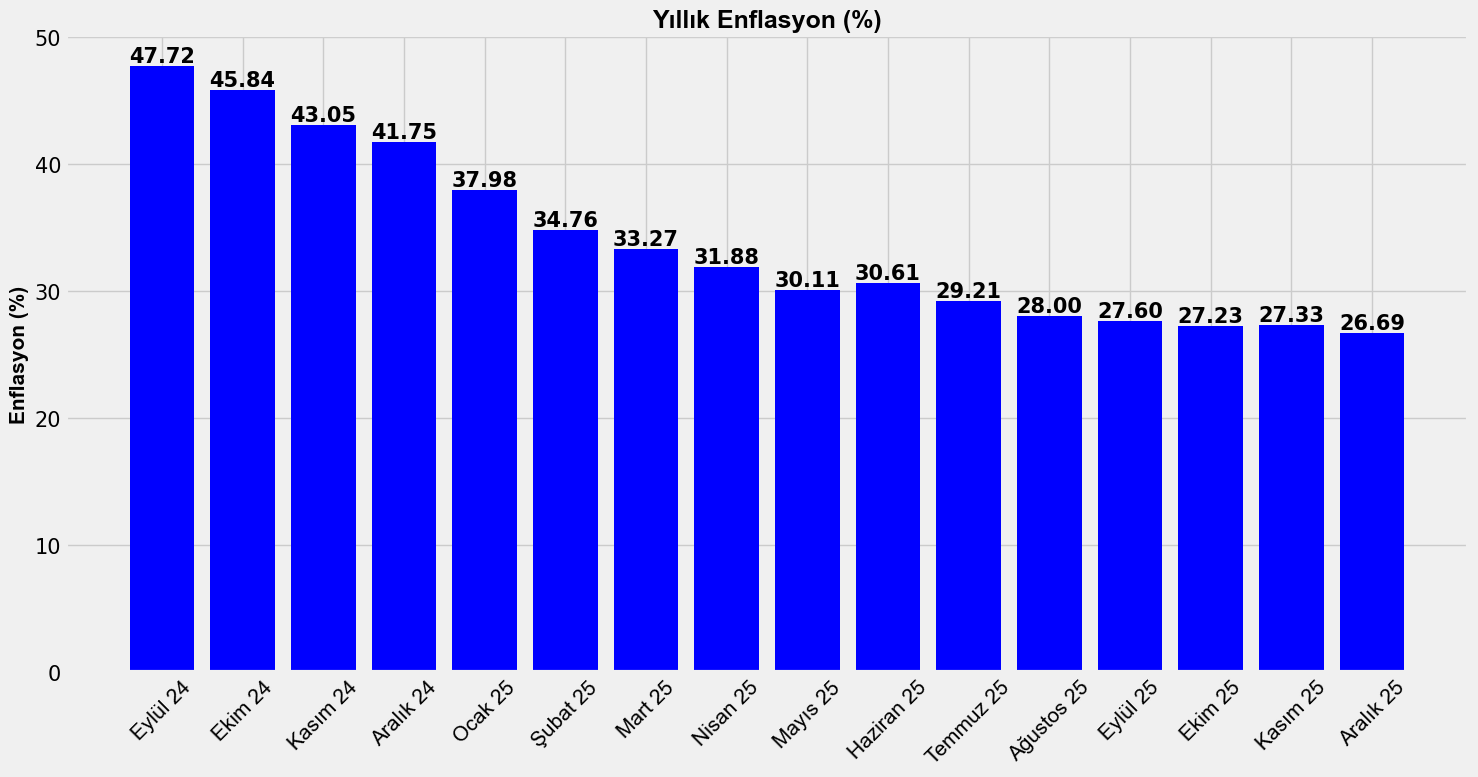

In [146]:

turkish_months = [
    "Eylül 24", "Ekim 24", "Kasım 24", "Aralık 24", "Ocak 25", "Şubat 25",
    "Mart 25", "Nisan 25", "Mayıs 25", "Haziran 25", "Temmuz 25", "Ağustos 25",
    "Eylül 25", "Ekim 25", "Kasım 25", "Aralık 25"
]

# Çubuk grafiği oluşturma
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(
    turkish_months,
    yıllıktahmin1["Ortalama"].loc["2024-09-30":"2025-12-31"],
    color='blue'
)

# Barların üstüne değerleri yazma
for bar, value in zip(bars, yıllıktahmin1["Ortalama"].loc["2024-09-30":"2025-12-31"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X pozisyonu (barın ortası)
        bar.get_height(),  # Y pozisyonu (barın yüksekliği)
        f'{value:.2f}',  # Yazılacak metin (2 ondalık basamak)
        ha='center',  # Metni ortala
        va='bottom',  # Barın üst kısmına yerleştir
        fontsize=15,
        fontweight='bold',
        color='black',
        family="Arial Black"
    )

# X ekseni ayarları
ax.set_xticks(np.arange(len(turkish_months)))
ax.set_xticklabels(turkish_months, rotation=45, fontsize=15, color="black", fontfamily="Arial")

# Y ekseni ayarları
ax.set_ylabel("Enflasyon (%)", fontsize=15, fontweight='bold', color="black", fontfamily="Arial")
ax.tick_params(axis='y', labelsize=15, labelcolor='black')

# Başlık
ax.set_title("Yıllık Enflasyon (%)", fontsize=18, fontweight='bold', color="black", fontfamily="Arial")

# Grafik düzenlemesi
plt.tight_layout()
plt.savefig('forecast.png', bbox_inches='tight')
plt.savefig("./yearlyforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()